# Import Libraries

In [1]:
!pip install keras tensorflow --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 3.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.20.0 which is incompatible.


In [2]:
!pip install kagglehub

In [3]:
!pip install pandasgui

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 4.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.9/983.9 kB 24.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 103.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.1/277.1 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 31.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 6.5 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 11.6 MB/s eta 0:00:00
  Created wheel for pa

In [4]:
!pip install vit-keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.9 MB/s eta 0:00:00


In [5]:
import warnings, os
import tensorflow as tf
import logging
import absl.logging
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel('ERROR')
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_DISABLE_MODEL_PRUNING'] = '1'
absl.logging.set_verbosity(absl.logging.ERROR)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

try:
    if not hasattr(tf.keras.backend, "_gradient_registry"):
        tf.keras.backend._gradient_registry = {}
    elif tf.keras.backend._gradient_registry is None:
        tf.keras.backend._gradient_registry = {}
except:
    pass

try:
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
except:
    pass

try:
    from tensorflow.python.util import deprecation
    deprecation._PRINT_DEPRECATION_WARNINGS = False
except:
    pass

In [6]:
import os
import numpy as np
import shutil
import hashlib
import random
from collections import defaultdict , Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization , GlobalAveragePooling2D , Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau ,Callback
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tqdm import tqdm
import random
import shutil
import tensorflow_hub as hub
from tensorflow.keras.applications.resnet50 import preprocess_input
# from vit_keras import vit
import itertools
import seaborn as sns
import time

In [7]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

# print("Path to dataset files:", path)
# path = "/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3"

In [8]:
# # List all files and directories
# path = "/root/.cache/kagglehub/datasets/abdallahalidev/plantvillage-dataset/versions/3/plantvillage dataset"
# contents = os.listdir(path)
# print("Contents of the directory:", contents)

In [9]:
# # dataframe:
# # uuid: CCEF9B0B-11C3-46FA-9E33-F97406FB89FB
# # output_variable:
# # config_str:

# import google.colabsqlviz.explore_dataframe as _vizcell
# _vizcell.explore_dataframe(df_or_df_name='', uuid='CCEF9B0B-11C3-46FA-9E33-F97406FB89FB')

# Dataset Cleaning

In [10]:
ORIGINAL_DIR = "/kaggle/input/plantvillage dataset/color"
CLEAN_DIR = "/kaggle/working/plantvillage_clean"

if os.path.exists(CLEAN_DIR):
    shutil.rmtree(CLEAN_DIR)

print("Copying dataset and removing exact duplicates...\n")

hash_dict = {}           
duplicates_removed = 0
copied_images = 0

for root, dirs, files in os.walk(ORIGINAL_DIR):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, file)
            
            with open(src_path, "rb") as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            
            rel_path = os.path.relpath(src_path, ORIGINAL_DIR)
            dst_path = os.path.join(CLEAN_DIR, rel_path)
            dst_folder = os.path.dirname(dst_path)
            
            if file_hash not in hash_dict:
                os.makedirs(dst_folder, exist_ok=True)
                shutil.copy2(src_path, dst_path)
                hash_dict[file_hash] = dst_path
                copied_images += 1
            else:
                duplicates_removed += 1

print("Dataset cleaning completed!")
print(f"Unique images copied      : {copied_images:,}")
print(f"Exact duplicates skipped  : {duplicates_removed:,}")
print(f"Clean dataset path        : {CLEAN_DIR}")

SOURCE_DIR = CLEAN_DIR

Copying dataset and removing exact duplicates...

Dataset cleaning completed!
Unique images copied      : 54,284
Exact duplicates skipped  : 21
Clean dataset path        : /kaggle/working/plantvillage_clean


# Dataset Exploration & Visualization

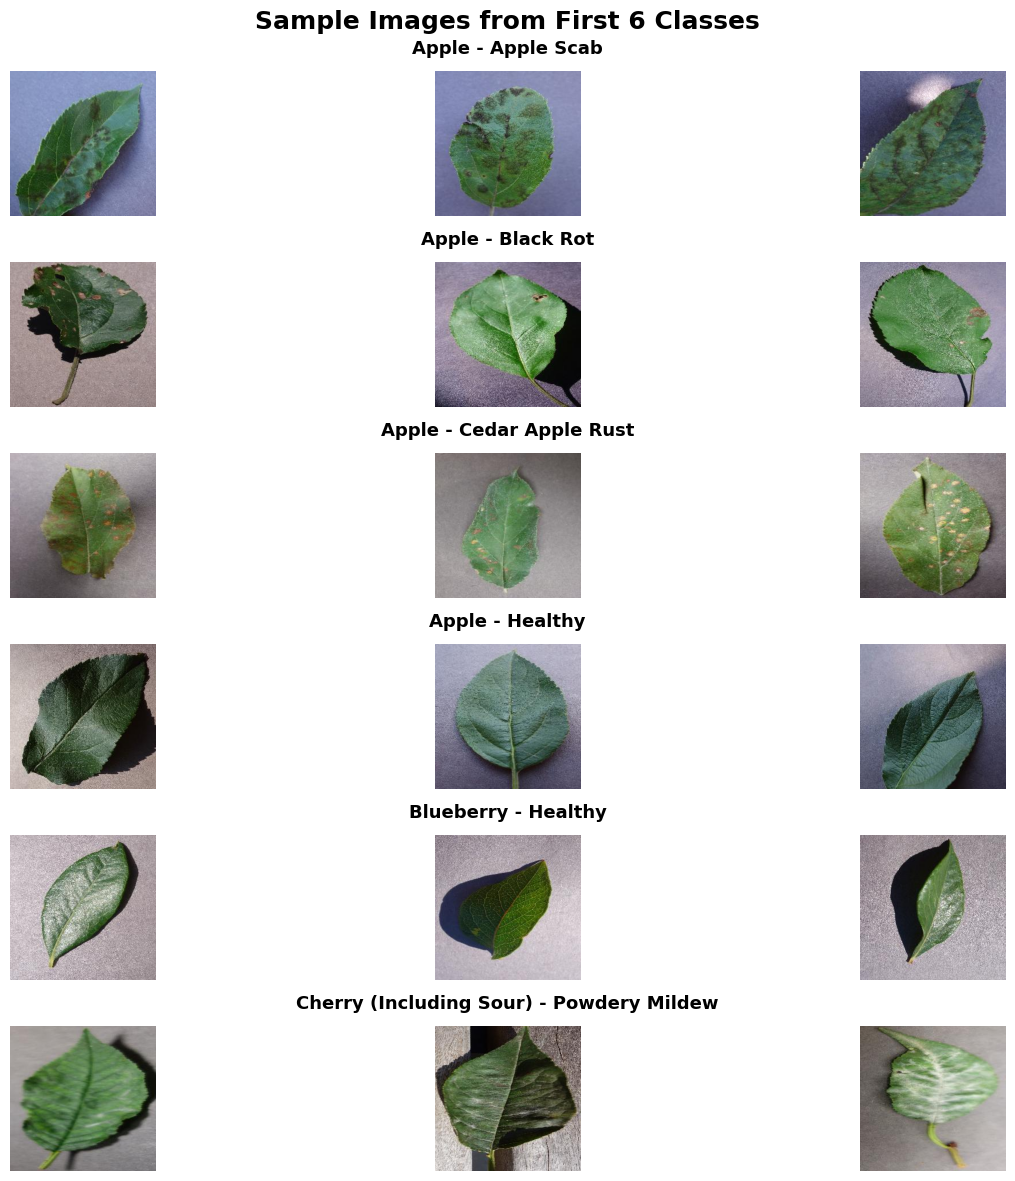

In [11]:
SOURCE_DIR = "/kaggle/working/plantvillage_clean"

classes = sorted([d for d in os.listdir(SOURCE_DIR) 
                  if os.path.isdir(os.path.join(SOURCE_DIR, d))])[:6]

plt.figure(figsize=(15, 12))
plt.suptitle("Sample Images from First 6 Classes", 
             fontsize=18, fontweight='bold', y=0.98)

plot_num = 1
for cls in classes:
    cls_path = os.path.join(SOURCE_DIR, cls)
    images = [f for f in os.listdir(cls_path) 
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    samples = random.sample(images, min(3, len(images)))
    
    plant = cls.split("___")[0].replace("_", " ").title()
    disease = "Healthy" if len(cls.split("___")) == 1 else cls.split("___")[1].replace("_", " ").title()
    title = f"{plant} - {disease}"
    
    for img_file in samples:
        img_path = os.path.join(cls_path, img_file)
        img = plt.imread(img_path)
        
        plt.subplot(6, 3, plot_num)
        plt.imshow(img)
        if plot_num % 3 == 2: 
            plt.title(title, fontsize=13, fontweight='bold', pad=12)
        plt.axis('off')
        plot_num += 1

plt.tight_layout()
plt.show()

# Config & Data Splitting

In [12]:
IMG_SIZE = 224
BATCH_SIZE = 16
NUM_EPOCHS = 30
FINE_TUNE_EPOCH=10
VALIDATION_SPLIT=0.15
TEST_SPLIT= 0.15

In [13]:
# Paths
SOURCE_DIR = "/kaggle/working/plantvillage_clean"   
WORK_DIR   = "/kaggle/working/plantvillage_split"

train_dir = os.path.join(WORK_DIR, "train")
val_dir   = os.path.join(WORK_DIR, "val")
test_dir  = os.path.join(WORK_DIR, "test")

# Clean previous split (fresh start)
for folder in [train_dir, val_dir, test_dir]:
    if os.path.exists(folder):
        shutil.rmtree(folder)

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir,   exist_ok=True)
os.makedirs(test_dir,  exist_ok=True)

print("Splitting dataset... (70% train | 15% val | 15% test)")

classes = sorted([c for c in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, c))])

for cls in classes:
    cls_path = os.path.join(SOURCE_DIR, cls)
    images = [os.path.join(cls_path, img) for img in os.listdir(cls_path)
              if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # First: separate test set (15%)
    train_val_imgs, test_imgs = train_test_split(
        images, test_size=TEST_SPLIT, random_state=42, shuffle=True)
    
    # Then: from remaining 85%, take 15% of total remaining for validation
    train_imgs, val_imgs = train_test_split(
        train_val_imgs,
        test_size=VALIDATION_SPLIT / (1 - TEST_SPLIT),  
        random_state=42,
        shuffle=True
    )
    
    # Create class folders and copy images
    for split_dir, split_imgs in zip([train_dir, val_dir, test_dir],
                                     [train_imgs, val_imgs, test_imgs]):
        os.makedirs(os.path.join(split_dir, cls), exist_ok=True)
        for src_path in split_imgs:
            shutil.copy(src_path, os.path.join(split_dir, cls))

print("Dataset split completed successfully!")
print(f"Train → {train_dir}")
print(f"Val   → {val_dir}")
print(f"Test  → {test_dir}")

Splitting dataset... (70% train | 15% val | 15% test)
Dataset split completed successfully!
Train → /kaggle/working/plantvillage_split/train
Val   → /kaggle/working/plantvillage_split/val
Test  → /kaggle/working/plantvillage_split/test


In [14]:
# Check the new split folders 
print("Split completed successfully!")

print(f"\nTrain directory: {train_dir}")
print(f"Number of classes in train:", len(os.listdir(train_dir)))
print(f"Total train images: {sum(len(os.listdir(os.path.join(train_dir, c))) for c in os.listdir(train_dir))}")

print(f"\nValidation directory: {val_dir}")
print(f"Number of classes in val:  {len(os.listdir(val_dir))}")
print(f"Total val images:   {sum(len(os.listdir(os.path.join(val_dir, c))) for c in os.listdir(val_dir))}")

print(f"\nTest directory: {test_dir}")
print(f"Number of classes in test: {len(os.listdir(test_dir))}")
print(f"Total test images:  {sum(len(os.listdir(os.path.join(test_dir, c))) for c in os.listdir(test_dir))}")

Split completed successfully!

Train directory: /kaggle/working/plantvillage_split/train
Number of classes in train: 38
Total train images: 37971

Validation directory: /kaggle/working/plantvillage_split/val
Number of classes in val:  38
Total val images:   8154

Test directory: /kaggle/working/plantvillage_split/test
Number of classes in test: 38
Total test images:  8159


In [15]:
def get_class_counts(directory):
    """Count images in each class folder"""
    counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            counts[class_name] = len(images)
    return counts

# Create the variables your plot needs
source_counts = get_class_counts(SOURCE_DIR)
train_counts = get_class_counts(train_dir)
val_counts = get_class_counts(val_dir)
test_counts = get_class_counts(test_dir)

# Print to verify
print(f"Original: {sum(source_counts.values())} images")
print(f"Train: {sum(train_counts.values())} images")
print(f"Validation: {sum(val_counts.values())} images")
print(f"Test: {sum(test_counts.values())} images")

Original: 54284 images
Train: 37971 images
Validation: 8154 images
Test: 8159 images


# Class Distribution Plot

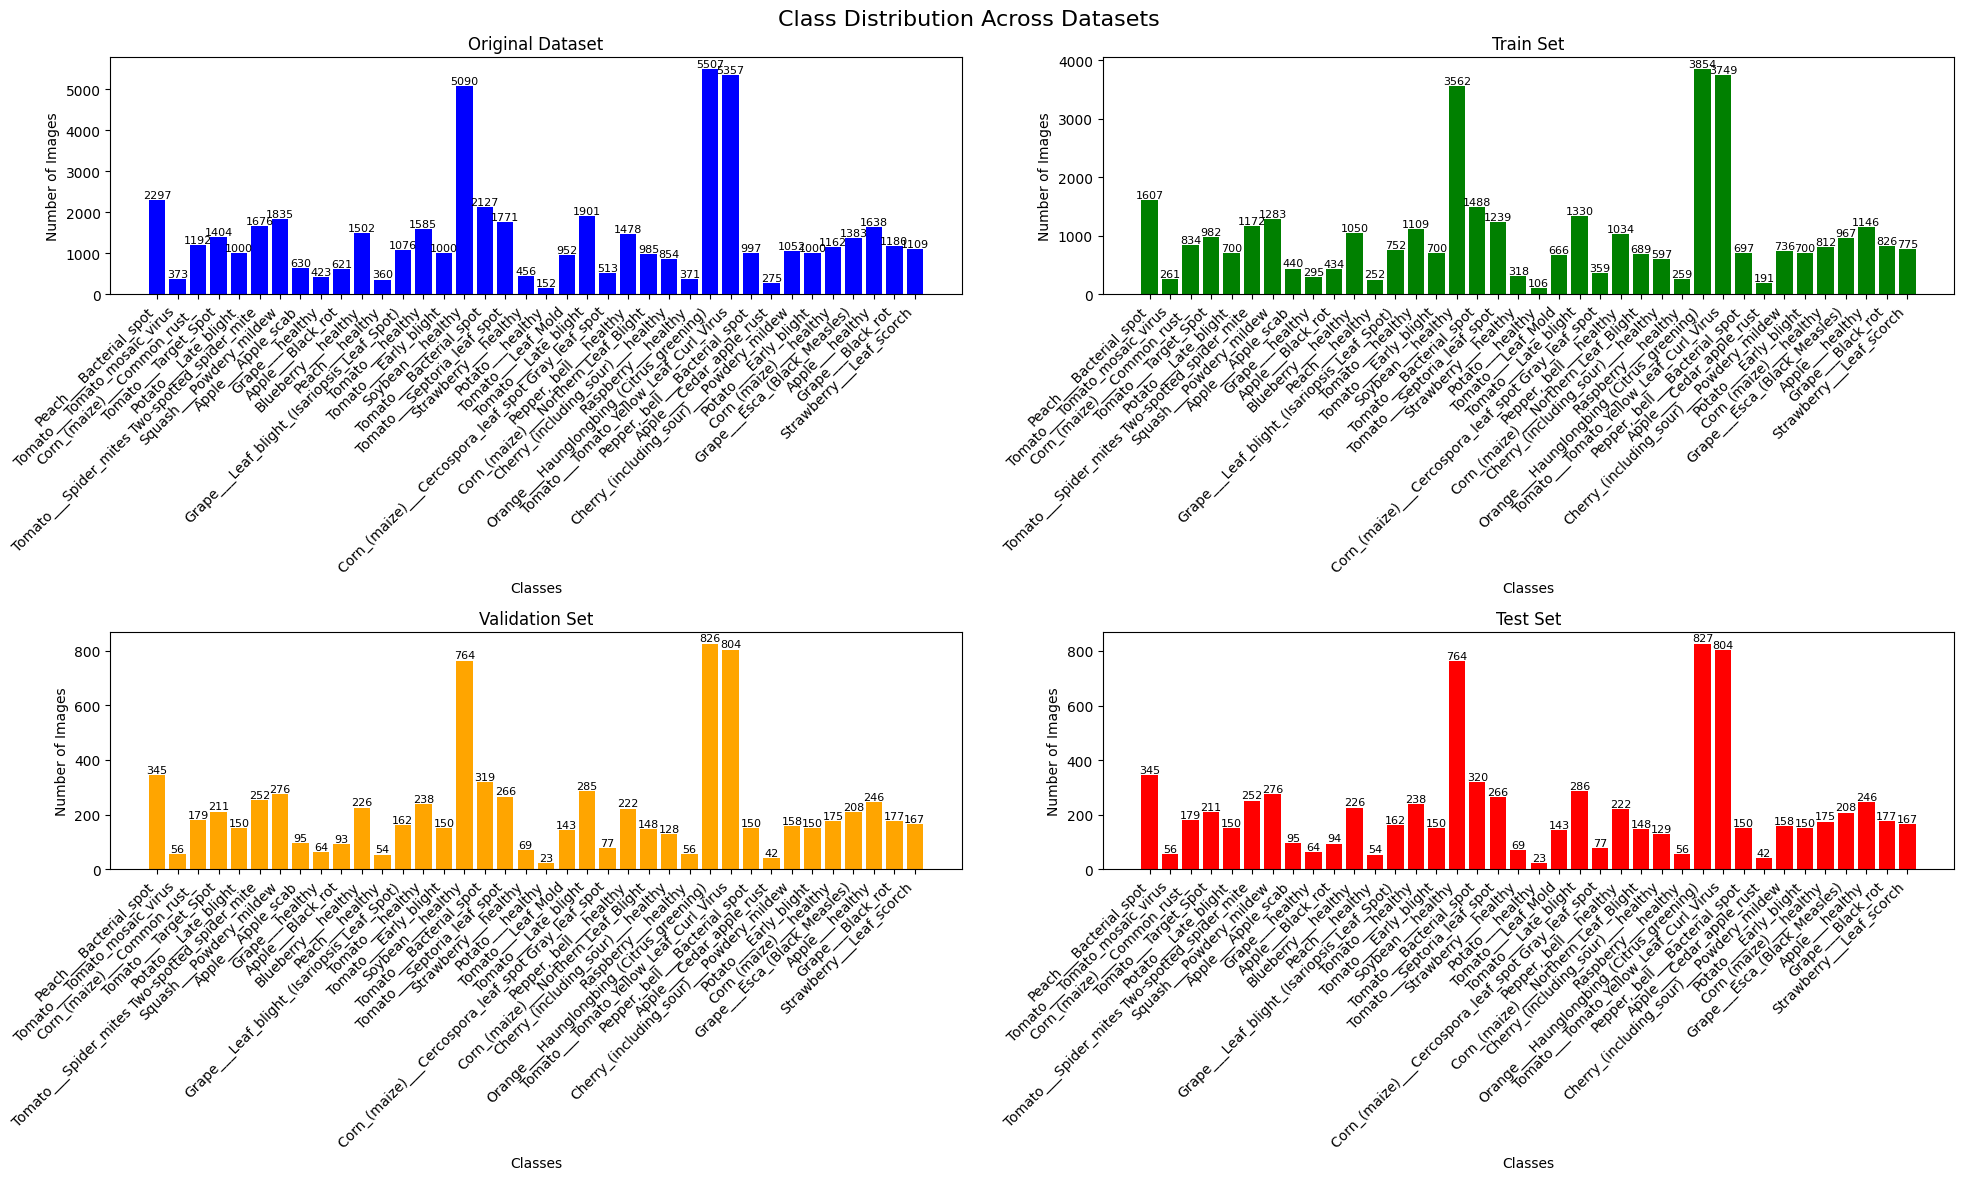

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Class Distribution Across Datasets', fontsize=16)

datasets = [('Original Dataset', source_counts, 'blue', ax[0, 0]),
            ('Train Set', train_counts, 'green', ax[0, 1]),
            ('Validation Set', val_counts, 'orange', ax[1, 0]),
            ('Test Set', test_counts, 'red', ax[1, 1])]

for title, counts, color, axis in datasets:
    classes = list(counts.keys())
    values = list(counts.values())
    
    bars = axis.bar(classes, values, color=color)
    axis.set_title(title)
    axis.set_xlabel('Classes')
    axis.set_ylabel('Number of Images')
    
    axis.set_xticklabels(classes, rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        axis.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Data Generators

In [17]:
TRAIN_DIR = "/kaggle/working/plantvillage_split/train"
VAL_DIR   = "/kaggle/working/plantvillage_split/val"
TEST_DIR  = "/kaggle/working/plantvillage_split/test"

In [18]:
def plot_class_distribution(labels, class_names, max_classes_to_show=20):
    plt.figure(figsize=(18, 8))
    
    unique, counts = np.unique(labels, return_counts=True)
    
    if len(unique) > max_classes_to_show:
        sorted_indices = np.argsort(-counts)
        unique = unique[sorted_indices[:max_classes_to_show]]
        counts = counts[sorted_indices[:max_classes_to_show]]
        shown_class_names = [class_names[i] for i in unique]
        title_suffix = f" (Top {max_classes_to_show} classes only)"
    else:
        shown_class_names = [class_names[i] for i in unique]
        title_suffix = ""
    
    plt.subplot(1, 2, 1)
    bars = plt.bar(range(len(unique)), counts)
    plt.xticks(range(len(unique)), shown_class_names, 
               rotation=90, ha='center', fontsize=8)
    plt.title(f'Class Distribution{title_suffix}')
    plt.ylabel('Count')
    
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                str(count), ha='center', va='bottom', fontsize=8, rotation=90)
    
    if len(unique) <= 15:
        plt.subplot(1, 2, 2)
        plt.pie(counts, labels=shown_class_names, autopct='%1.1f%%')
        plt.title(f'Class Percentage{title_suffix}')
    else:
        plt.subplot(1, 2, 2)
        plt.hist(counts, bins=20, edgecolor='black')
        plt.title(f'Distribution of Class Sizes{title_suffix}')
        plt.xlabel('Number of samples per class')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("CLASS DISTRIBUTION STATISTICS")
    print(f"Total samples: {len(labels):,}")
    print(f"Number of classes: {len(np.unique(labels))}")
    print(f"Max class size: {max(counts):,}")
    print(f"Min class size: {min(counts):,}")
    print(f"Imbalance ratio: {max(counts)/min(counts):.2f}:1")
    print(f"Average class size: {np.mean(counts):.2f}")
    print(f"Median class size: {np.median(counts):.2f}")
    print(f"Standard deviation: {np.std(counts):.2f}")
    
    print("\nTop 5 largest classes:")
    sorted_indices = np.argsort(-counts)
    for i in range(min(5, len(unique))):
        idx = sorted_indices[i]
        print(f"  {class_names[idx]}: {counts[idx]:,} samples")
    
    print("\nTop 5 smallest classes:")
    sorted_indices = np.argsort(counts)
    for i in range(min(5, len(unique))):
        idx = sorted_indices[i]
        print(f"  {class_names[idx]}: {counts[idx]:,} samples")

In [19]:
ORIGINAL_DATA_DIR = "/kaggle/working/plantvillage_split/train"

train_gen_before = ImageDataGenerator().flow_from_directory(
    ORIGINAL_DATA_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_gen_before.class_indices.keys())

labels = train_gen_before.classes

unique, counts = np.unique(labels, return_counts=True)

print("Number of samples per class:")
for cls_idx, count in zip(unique, counts):
    print(f"{class_names[cls_idx]}: {count} samples")


Found 37971 images belonging to 38 classes.
Number of samples per class:
Apple___Apple_scab: 440 samples
Apple___Black_rot: 434 samples
Apple___Cedar_apple_rust: 191 samples
Apple___healthy: 1146 samples
Blueberry___healthy: 1050 samples
Cherry_(including_sour)___Powdery_mildew: 736 samples
Cherry_(including_sour)___healthy: 597 samples
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 359 samples
Corn_(maize)___Common_rust_: 834 samples
Corn_(maize)___Northern_Leaf_Blight: 689 samples
Corn_(maize)___healthy: 812 samples
Grape___Black_rot: 826 samples
Grape___Esca_(Black_Measles): 967 samples
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 752 samples
Grape___healthy: 295 samples
Orange___Haunglongbing_(Citrus_greening): 3854 samples
Peach___Bacterial_spot: 1607 samples
Peach___healthy: 252 samples
Pepper,_bell___Bacterial_spot: 697 samples
Pepper,_bell___healthy: 1034 samples
Potato___Early_blight: 700 samples
Potato___Late_blight: 700 samples
Potato___healthy: 106 samples
Raspberry___h

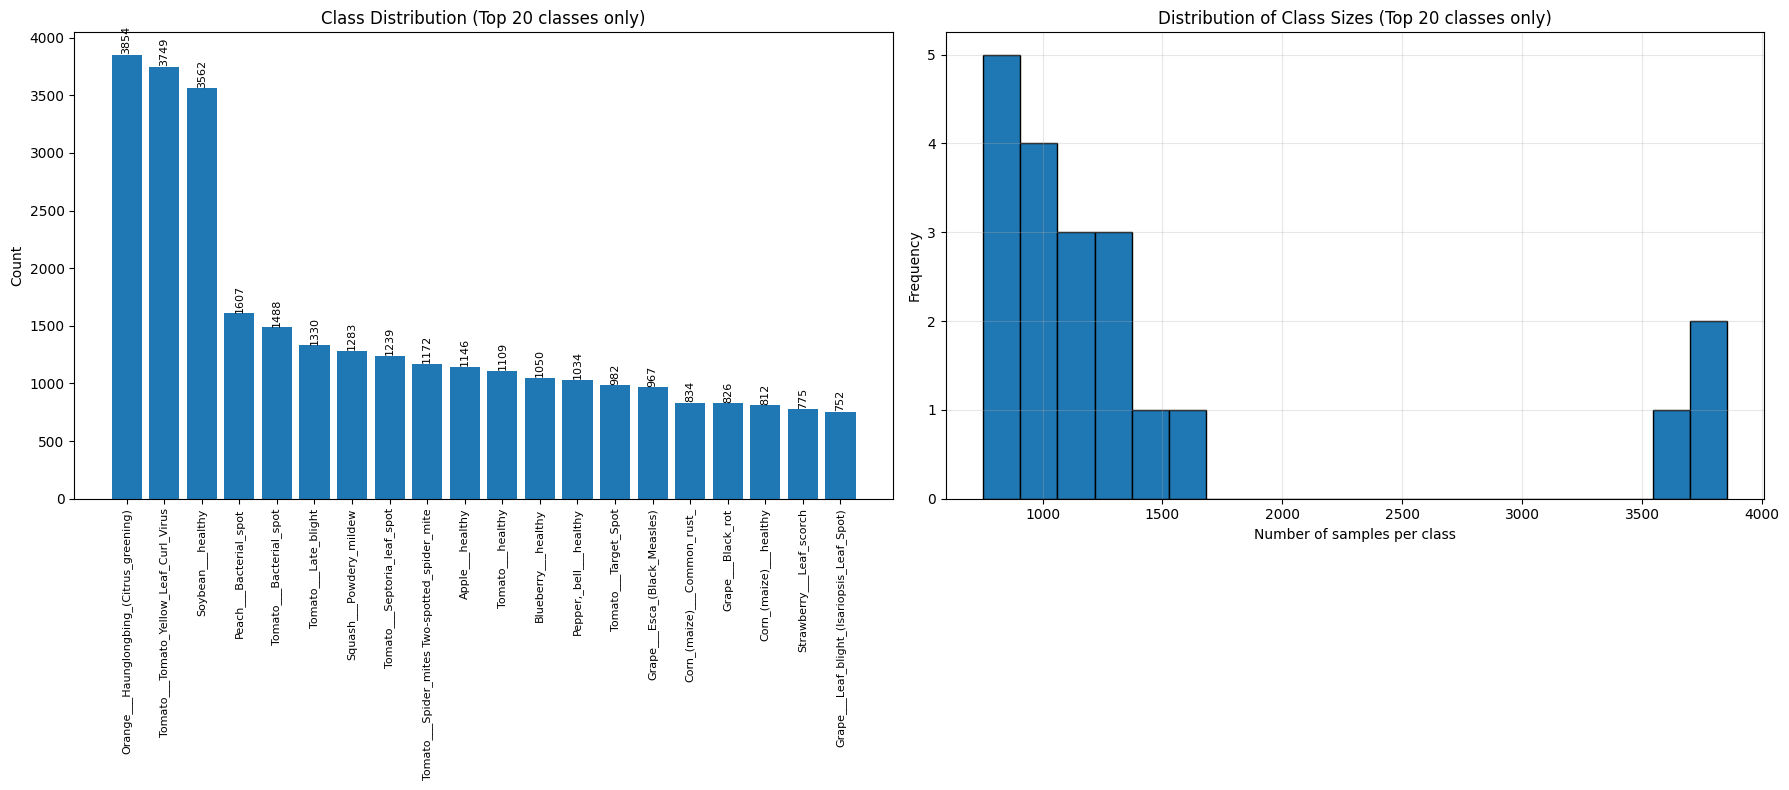

CLASS DISTRIBUTION STATISTICS
Total samples: 37,971
Number of classes: 38
Max class size: 3,854
Min class size: 752
Imbalance ratio: 5.12:1
Average class size: 1478.55
Median class size: 1127.50
Standard deviation: 969.84

Top 5 largest classes:
  Apple___Apple_scab: 3,854 samples
  Apple___Black_rot: 3,749 samples
  Apple___Cedar_apple_rust: 3,562 samples
  Apple___healthy: 1,607 samples
  Blueberry___healthy: 1,488 samples

Top 5 smallest classes:
  Pepper,_bell___healthy: 752 samples
  Pepper,_bell___Bacterial_spot: 775 samples
  Peach___healthy: 812 samples
  Peach___Bacterial_spot: 826 samples
  Orange___Haunglongbing_(Citrus_greening): 834 samples


In [20]:
plot_class_distribution(
    train_gen_before.classes,
    list(train_gen_before.class_indices.keys())
)

# Augmentation & Handle Imbalance

In [26]:
SOURCE_DIR = "/kaggle/working/plantvillage_split/train"   
TARGET_DIR = "/kaggle/working/plantvillage_physical_augmented"  
TARGET_COUNT = 1500
IMG_SIZE = 224

augmentor = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1,
)

os.makedirs(TARGET_DIR, exist_ok=True)

for class_name in sorted(os.listdir(SOURCE_DIR)):
    class_src_path = os.path.join(SOURCE_DIR, class_name)
    class_dst_path = os.path.join(TARGET_DIR, class_name)
    if not os.path.isdir(class_src_path):
        continue
    os.makedirs(class_dst_path, exist_ok=True)

    images = [f for f in os.listdir(class_src_path)
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(images)

    print(f"\nClass: {class_name} | Current images: {current_count}")

    # Copy original images
    for img_name in images:
        src = os.path.join(class_src_path, img_name)
        dst = os.path.join(class_dst_path, img_name)
        if not os.path.exists(dst):
            save_img(dst, img_to_array(load_img(src, target_size=(IMG_SIZE, IMG_SIZE))))

    if current_count < TARGET_COUNT:
        # Generate augmented images
        needed = TARGET_COUNT - current_count
        print(f"Generating {needed} augmented images...")
        i = 0
        pbar = tqdm(total=needed)
        while i < needed:
            img_name = np.random.choice(images)
            img_path = os.path.join(class_src_path, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            x = img_to_array(img).reshape((1,) + img_to_array(img).shape)
            for batch in augmentor.flow(x, batch_size=1):
                aug_img_path = os.path.join(class_dst_path, f"aug_{i}_{img_name}")
                save_img(aug_img_path, batch[0])
                i += 1
                pbar.update(1)
                if i >= needed:
                    break
        pbar.close()
    elif current_count > TARGET_COUNT:
        # Downsample if too many images
        print(f"Downsampling to {TARGET_COUNT} images...")
        all_images = os.listdir(class_dst_path)
        to_remove = random.sample(all_images, current_count - TARGET_COUNT)
        for img_name in to_remove:
            os.remove(os.path.join(class_dst_path, img_name))

print("\nPhysical augmentation completed. Each class has exactly 1500 images!")



Class: Apple___Apple_scab | Current images: 440
Generating 1060 augmented images...


100%|██████████| 1060/1060 [00:12<00:00, 83.64it/s]



Class: Apple___Black_rot | Current images: 434
Generating 1066 augmented images...


100%|██████████| 1066/1066 [00:13<00:00, 80.06it/s]



Class: Apple___Cedar_apple_rust | Current images: 191
Generating 1309 augmented images...


100%|██████████| 1309/1309 [00:15<00:00, 83.92it/s]



Class: Apple___healthy | Current images: 1146
Generating 354 augmented images...


100%|██████████| 354/354 [00:04<00:00, 83.64it/s]



Class: Blueberry___healthy | Current images: 1050
Generating 450 augmented images...


100%|██████████| 450/450 [00:05<00:00, 84.14it/s]



Class: Cherry_(including_sour)___Powdery_mildew | Current images: 736
Generating 764 augmented images...


100%|██████████| 764/764 [00:09<00:00, 83.82it/s]



Class: Cherry_(including_sour)___healthy | Current images: 597
Generating 903 augmented images...


100%|██████████| 903/903 [00:10<00:00, 84.50it/s]



Class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot | Current images: 359
Generating 1141 augmented images...


100%|██████████| 1141/1141 [00:13<00:00, 83.61it/s]



Class: Corn_(maize)___Common_rust_ | Current images: 834
Generating 666 augmented images...


100%|██████████| 666/666 [00:07<00:00, 83.86it/s]



Class: Corn_(maize)___Northern_Leaf_Blight | Current images: 689
Generating 811 augmented images...


100%|██████████| 811/811 [00:09<00:00, 83.78it/s]



Class: Corn_(maize)___healthy | Current images: 812
Generating 688 augmented images...


100%|██████████| 688/688 [00:08<00:00, 84.77it/s]



Class: Grape___Black_rot | Current images: 826
Generating 674 augmented images...


100%|██████████| 674/674 [00:08<00:00, 83.88it/s]



Class: Grape___Esca_(Black_Measles) | Current images: 967
Generating 533 augmented images...


100%|██████████| 533/533 [00:06<00:00, 83.22it/s]



Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) | Current images: 752
Generating 748 augmented images...


100%|██████████| 748/748 [00:08<00:00, 83.91it/s]



Class: Grape___healthy | Current images: 295
Generating 1205 augmented images...


100%|██████████| 1205/1205 [00:14<00:00, 84.07it/s]



Class: Orange___Haunglongbing_(Citrus_greening) | Current images: 3854
Downsampling to 1500 images...

Class: Peach___Bacterial_spot | Current images: 1607
Downsampling to 1500 images...

Class: Peach___healthy | Current images: 252
Generating 1248 augmented images...


100%|██████████| 1248/1248 [00:14<00:00, 84.26it/s]



Class: Pepper,_bell___Bacterial_spot | Current images: 697
Generating 803 augmented images...


100%|██████████| 803/803 [00:09<00:00, 84.32it/s]



Class: Pepper,_bell___healthy | Current images: 1034
Generating 466 augmented images...


100%|██████████| 466/466 [00:05<00:00, 84.47it/s]



Class: Potato___Early_blight | Current images: 700
Generating 800 augmented images...


100%|██████████| 800/800 [00:09<00:00, 84.04it/s]



Class: Potato___Late_blight | Current images: 700
Generating 800 augmented images...


100%|██████████| 800/800 [00:09<00:00, 84.01it/s]



Class: Potato___healthy | Current images: 106
Generating 1394 augmented images...


100%|██████████| 1394/1394 [00:16<00:00, 84.12it/s]



Class: Raspberry___healthy | Current images: 259
Generating 1241 augmented images...


100%|██████████| 1241/1241 [00:14<00:00, 84.11it/s]



Class: Soybean___healthy | Current images: 3562
Downsampling to 1500 images...

Class: Squash___Powdery_mildew | Current images: 1283
Generating 217 augmented images...


100%|██████████| 217/217 [00:02<00:00, 83.72it/s]



Class: Strawberry___Leaf_scorch | Current images: 775
Generating 725 augmented images...


100%|██████████| 725/725 [00:08<00:00, 84.16it/s]



Class: Strawberry___healthy | Current images: 318
Generating 1182 augmented images...


100%|██████████| 1182/1182 [00:14<00:00, 83.97it/s]



Class: Tomato___Bacterial_spot | Current images: 1488
Generating 12 augmented images...


100%|██████████| 12/12 [00:00<00:00, 82.23it/s]


Class: Tomato___Early_blight | Current images: 700


Generating 800 augmented images...


100%|██████████| 800/800 [00:09<00:00, 83.72it/s]



Class: Tomato___Late_blight | Current images: 1330
Generating 170 augmented images...


100%|██████████| 170/170 [00:02<00:00, 84.12it/s]



Class: Tomato___Leaf_Mold | Current images: 666
Generating 834 augmented images...


100%|██████████| 834/834 [00:09<00:00, 83.74it/s]



Class: Tomato___Septoria_leaf_spot | Current images: 1239
Generating 261 augmented images...


100%|██████████| 261/261 [00:03<00:00, 82.99it/s]



Class: Tomato___Spider_mites Two-spotted_spider_mite | Current images: 1172
Generating 328 augmented images...


100%|██████████| 328/328 [00:03<00:00, 82.97it/s]



Class: Tomato___Target_Spot | Current images: 982
Generating 518 augmented images...


100%|██████████| 518/518 [00:06<00:00, 82.94it/s]



Class: Tomato___Tomato_Yellow_Leaf_Curl_Virus | Current images: 3749
Downsampling to 1500 images...

Class: Tomato___Tomato_mosaic_virus | Current images: 261
Generating 1239 augmented images...


100%|██████████| 1239/1239 [00:14<00:00, 82.89it/s]



Class: Tomato___healthy | Current images: 1109
Generating 391 augmented images...


100%|██████████| 391/391 [00:04<00:00, 81.63it/s]


Physical augmentation completed. Each class has exactly 1500 images!


Class Distribution After Augmentation
 1. Peach___Bacterial_spot                            : 1500 images
 2. Tomato___Tomato_mosaic_virus                      : 1500 images
 3. Corn_(maize)___Common_rust_                       : 1500 images
 4. Tomato___Target_Spot                              : 1500 images
 5. Potato___Late_blight                              : 1500 images
 6. Tomato___Spider_mites Two-spotted_spider_mite     : 1500 images
 7. Squash___Powdery_mildew                           : 1500 images
 8. Apple___Apple_scab                                : 1500 images
 9. Grape___healthy                                   : 1500 images
10. Apple___Black_rot                                 : 1500 images
11. Blueberry___healthy                               : 1500 images
12. Peach___healthy                                   : 1500 images
13. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)        : 1500 images
14. Tomato___healthy                                  : 1500 images
15. Tomato

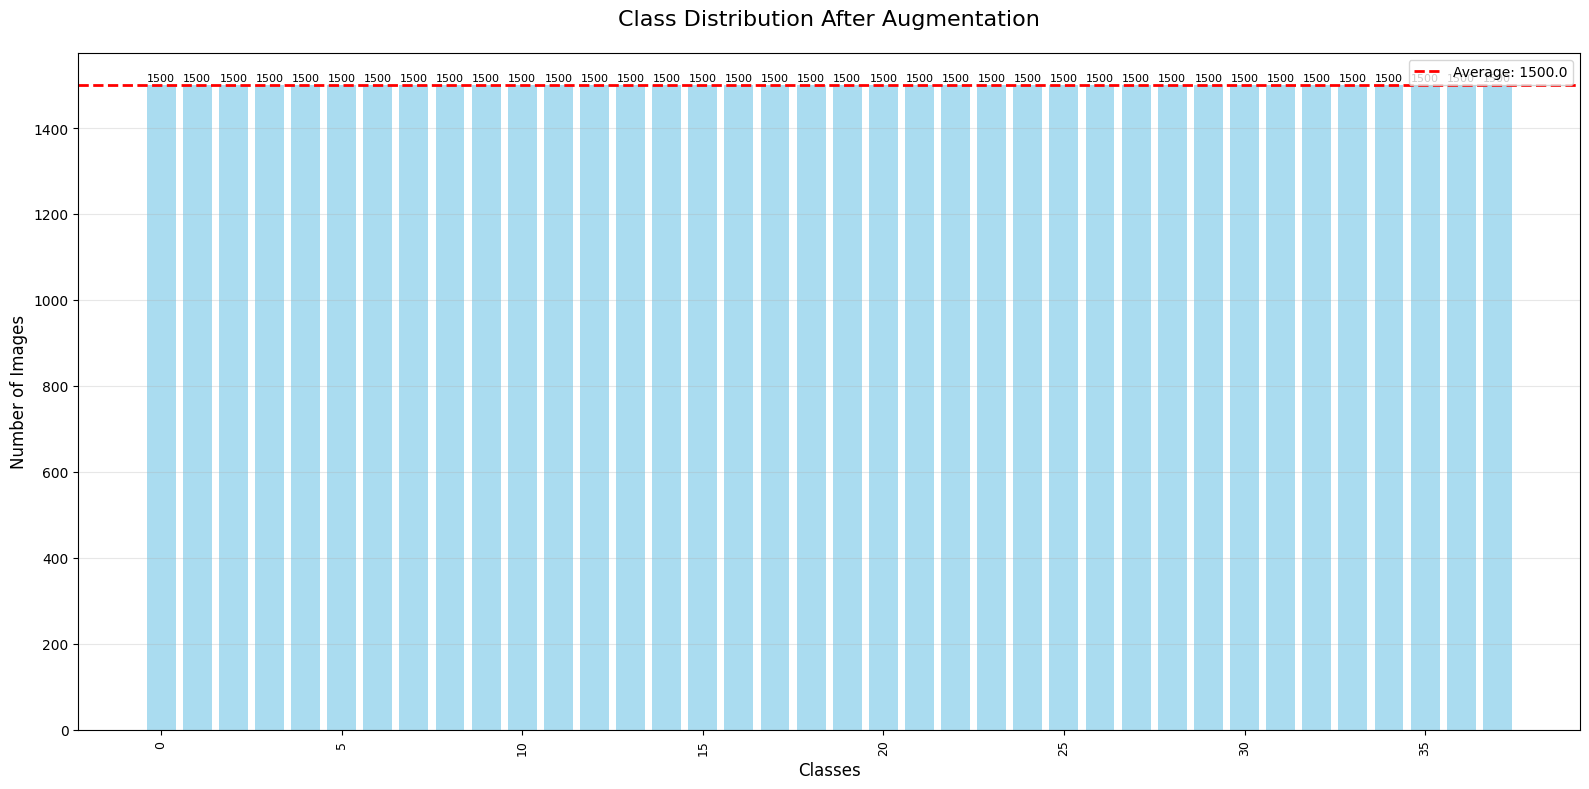

Underrepresented Classes (below 70% of average):
No significantly underrepresented classes
Batch Information:
Batch size: 16
Total batches: 3563
Average images per class per batch: 0.4

Batch distribution analysis:
  Peach___Bacterial_spot        : 0.4 images/batch on average
  Tomato___Tomato_mosaic_virus  : 0.4 images/batch on average
  Corn_(maize)___Common_rust_   : 0.4 images/batch on average


In [27]:
# Path to your training directory after augmentation
TARGET_DIR = "/kaggle/working/plantvillage_physical_augmented"

# 1. Count images per class
class_counts = {}
class_names = []

for class_name in os.listdir(TARGET_DIR):
    class_path = os.path.join(TARGET_DIR, class_name)
    if os.path.isdir(class_path):
        # Count image files
        num_images = len([f for f in os.listdir(class_path) 
                         if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
        class_counts[class_name] = num_images
        class_names.append(class_name)

# 2. Display results
print("Class Distribution After Augmentation")

# Sort classes by count
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

for i, (class_name, count) in enumerate(sorted_classes, 1):
    print(f"{i:2d}. {class_name:<50}: {count:>4d} images")

# 3. Overall statistics
total_images = sum(class_counts.values())
num_classes = len(class_counts)
min_count = min(class_counts.values())
max_count = max(class_counts.values())
avg_count = total_images / num_classes

print("Overall Statistics:")
print(f"Number of classes: {num_classes}")
print(f"Total images: {total_images}")
print(f"Average images per class: {avg_count:.1f}")
print(f"Smallest class: {min_count} images")
print(f"Largest class: {max_count} images")
print(f"Imbalance ratio (max/min): {max_count/min_count:.2f}")

# 4. Balance assessment
print("Balance Assessment:")

if max_count / min_count < 1.5:
    print("Data is well balanced")
elif max_count / min_count < 3:
    print("Data is reasonably balanced")
else:
    print("Data is imbalanced - needs attention")

# Calculate standard deviation
counts_array = np.array(list(class_counts.values()))
std_dev = np.std(counts_array)
cv = (std_dev / avg_count) * 100  # Coefficient of variation
print(f"Standard deviation: {std_dev:.1f}")
print(f"Coefficient of variation: {cv:.2f}%")

# 5. Bar chart visualization
plt.figure(figsize=(16, 8))
bars = plt.bar(range(len(class_counts)), 
               [class_counts[cls] for cls in class_names], 
               alpha=0.7, color='skyblue')

# Add average line
plt.axhline(y=avg_count, color='red', linestyle='--', 
            linewidth=2, label=f'Average: {avg_count:.1f}')

# Customize chart
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Class Distribution After Augmentation', fontsize=16, pad=20)

# Add numbers on bars
for bar, count in zip(bars, [class_counts[cls] for cls in class_names]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{count}', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90, fontsize=9)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Underrepresented classes
print("Underrepresented Classes (below 70% of average):")

underrepresented = [(cls, count) for cls, count in class_counts.items() 
                    if count < avg_count * 0.7]  # Less than 70% of average

if underrepresented:
    underrepresented = sorted(underrepresented, key=lambda x: x[1])
    for i, (cls, count) in enumerate(underrepresented, 1):
        print(f"{i:2d}. {cls:<50}: {count:>4d} images (Average: {avg_count:.1f})")
else:
    print("No significantly underrepresented classes")

# 8. Batch distribution analysis
print("Batch Information:")

# Use the same BATCH_SIZE from your generator
BATCH_SIZE = 16  
total_batches = int(np.ceil(total_images / BATCH_SIZE))

print(f"Batch size: {BATCH_SIZE}")
print(f"Total batches: {total_batches}")
print(f"Average images per class per batch: {avg_count / total_batches:.1f}")

# Batch analysis
print("\nBatch distribution analysis:")
for cls, count in sorted_classes[:3]:  # First 3 classes
    per_batch = count / total_batches
    print(f"  {cls[:30]:<30}: {per_batch:.1f} images/batch on average")

In [32]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/plantvillage_physical_augmented", 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


Found 57000 images belonging to 38 classes.


In [33]:
for images, labels in train_generator:
    print(images.shape, labels.shape)
    break

(16, 224, 224, 3) (16, 38)


Found 38 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', '

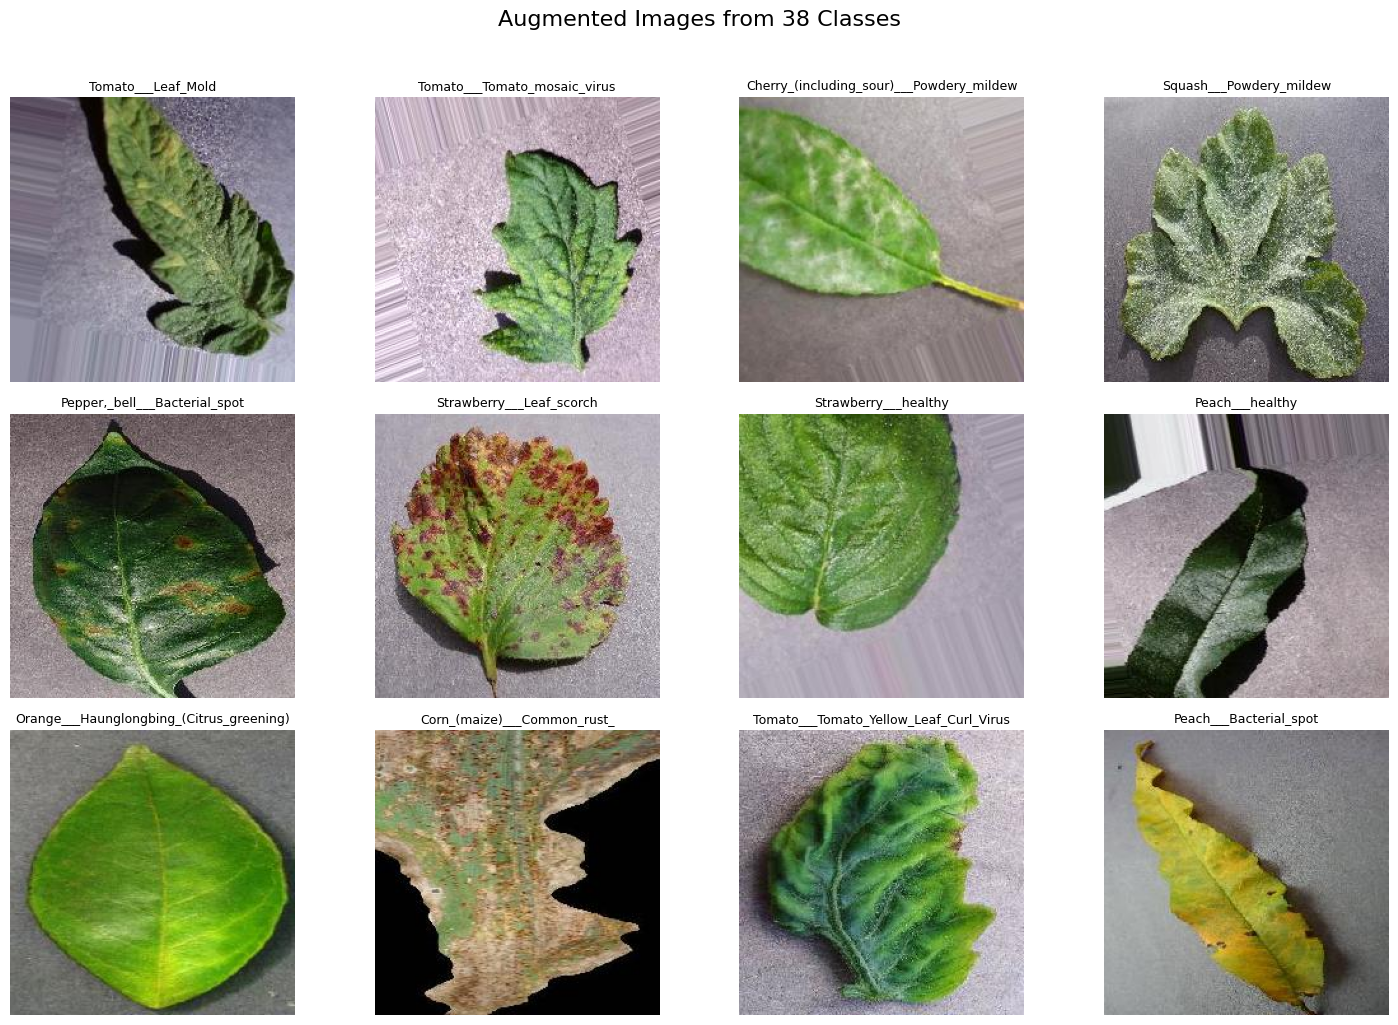


--- Distribution in this batch ---
Cherry_(including_sour)___Powdery_mildew: 2 images
Corn_(maize)___Common_rust_: 1 images
Orange___Haunglongbing_(Citrus_greening): 1 images
Peach___Bacterial_spot: 2 images
Peach___healthy: 1 images
Pepper,_bell___Bacterial_spot: 1 images
Raspberry___healthy: 1 images
Squash___Powdery_mildew: 1 images
Strawberry___Leaf_scorch: 1 images
Strawberry___healthy: 1 images
Tomato___Bacterial_spot: 1 images
Tomato___Leaf_Mold: 1 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 1 images
Tomato___Tomato_mosaic_virus: 1 images


In [34]:
# Take a batch
images, labels = next(train_generator)

# Get class names from generator
class_names = list(train_generator.class_indices.keys())
print(f"Found {len(class_names)} classes: {class_names}")

# Show some information
print(f"Batch shape - Images: {images.shape}, Labels: {labels.shape}")
print(f"Sample label (one-hot): {labels[0]}")
print(f"Corresponding class index: {np.argmax(labels[0])}")
print(f"Corresponding class name: {class_names[np.argmax(labels[0])]}")

# Plot images
plt.figure(figsize=(15, 10))
for i in range(min(12, len(images))):
    plt.subplot(3, 4, i+1)
    
    # Ensure pixel values are in correct range for display
    img_to_show = images[i]
    if img_to_show.max() <= 1.0:
        img_to_show = np.clip(img_to_show, 0, 1)
    else:
        img_to_show = np.clip(img_to_show, 0, 255).astype('uint8')
    
    plt.imshow(img_to_show)
    
    # Extract image class
    class_idx = np.argmax(labels[i])
    plt.title(f'{class_names[class_idx]}', fontsize=9, pad=5)
    plt.axis('off')

plt.suptitle(f'Augmented Images from {len(class_names)} Classes', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Statistics about distribution in this batch
print("\n--- Distribution in this batch ---")
unique, counts = np.unique(np.argmax(labels, axis=1), return_counts=True)
for idx, count in zip(unique, counts):
    print(f"{class_names[idx]}: {count} images")

In [40]:
# Validation & Test (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
#validation data loader
validation_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 8154 images belonging to 38 classes.


In [36]:
test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 8159 images belonging to 38 classes.


In [37]:
class_names=list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

# Build VGG-19 From Scratch

In [ ]:
model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Block 4
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Block 5
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.summary()


I0000 00:00:1765490359.013080      47 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 139,725,926 (533.01 MB)

 Trainable params: 139,725,926 (533.01 MB)

 Non-trainable params: 0 (0.00 B)

# Compile & Train VGG19

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint = ModelCheckpoint(
    "/kaggle/working/vgg19_best.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)


callbacks = [checkpoint, early_stop, reduce_lr]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=NUM_EPOCHS,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/30
   1/2375 ━━━━━━━━━━━━━━━━━━━━ 13:19:20 20s/step - accuracy: 0.0000e+00 - loss: 3.6375

I0000 00:00:1764297907.779712     150 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2375/2375 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1754 - loss: 3.0935
Epoch 1: val_accuracy improved from None to 0.33795, saving model to /kaggle/working/vgg19_best.keras
2375/2375 ━━━━━━━━━━━━━━━━━━━━ 504s 204ms/step - accuracy: 0.2302 - loss: 2.8537 - val_accuracy: 0.3380 - val_loss: 2.3879 - learning_rate: 1.0000e-04
Epoch 2/30
2375/2375 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.3932 - loss: 2.0963
Epoch 2: val_accuracy improved from 0.33795 to 0.63717, saving model to /kaggle/working/vgg19_best.keras
2375/2375 ━━━━━━━━━━━━━━━━━━━━ 475s 200ms/step - accuracy: 0.4655 - loss: 1.8191 - val_accuracy: 0.6372 - val_loss: 1.1596 - learning_rate: 1.0000e-04
Epoch 3/30
2375/2375 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6322 - loss: 1.1847
Epoch 3: val_accuracy improved from 0.63717 to 0.77078, saving model to /kaggle/working/vgg19_best.keras
2375/2375 ━━━━━━━━━━━━━━━━━━━━ 467s 196ms/step - accuracy: 0.6682 - loss: 1.0635 - val_accuracy: 0.7708 - val_loss: 0.7131 - le

In [ ]:
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
final_val_acc = history.history['val_accuracy'][-1]
final_train_acc = history.history['accuracy'][-1]

print(f"Best validation accuracy: {best_val_acc:.4f} at epoch {best_epoch}")
print(f"Final validation accuracy: {final_val_acc:.4f}")
print(f"Final training accuracy: {final_train_acc:.4f}")
print(f"Best model saved as: /kaggle/working/vgg19_best.keras")

Best validation accuracy: 0.9874 at epoch 27
Final validation accuracy: 0.9783
Final training accuracy: 0.9909
Best model saved as: /kaggle/working/vgg19_best.h5


In [ ]:
test_generator.reset()

test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // BATCH_SIZE + 1,
    verbose=1
)

print(f"\nFinal Test Accuracy  = {test_accuracy*100:.3f}%")
print(f"Final Test Loss       = {test_loss:.4f}")

511/511 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.9762 - loss: 0.0812

Final Test Accuracy  = 97.623%
Final Test Loss       = 0.0812


In [ ]:
y_pred = model.predict(test_generator,
                       steps = test_generator.samples // test_generator.batch_size + 1,
                       verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

511/511 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step


# Evaluation For VGG19

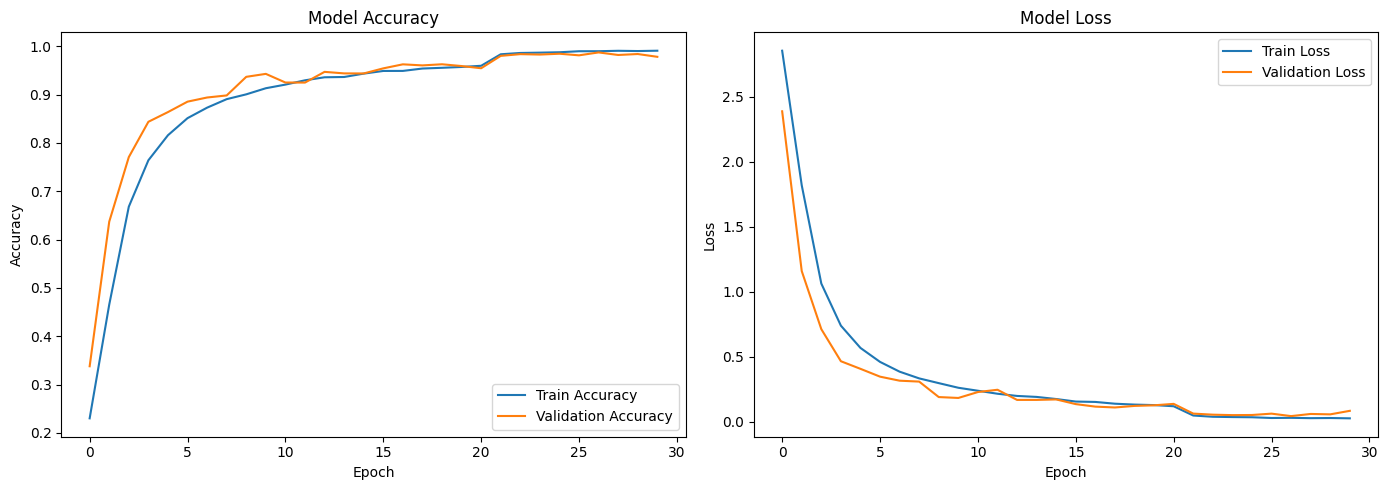

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

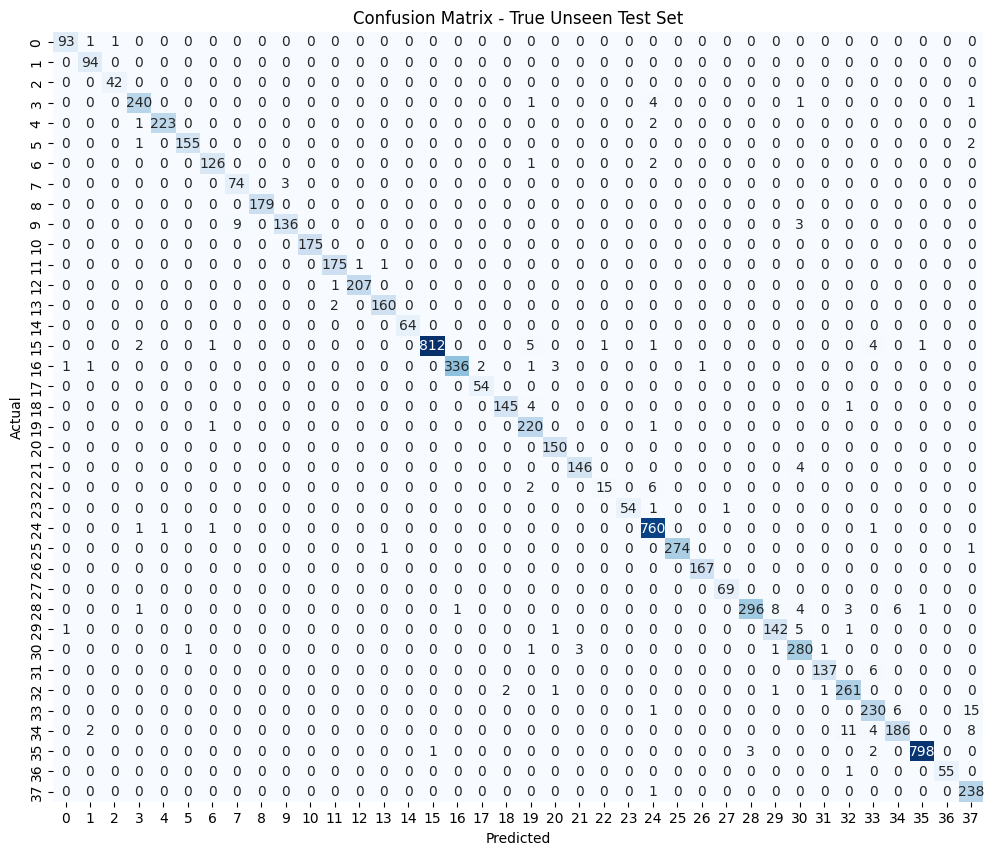

In [ ]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - True Unseen Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 5. Classification Report
print("Classification Report on True Test Set:\n")
class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report on True Test Set:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98        95
                                 Apple___Black_rot       0.96      1.00      0.98        94
                          Apple___Cedar_apple_rust       0.98      1.00      0.99        42
                                   Apple___healthy       0.98      0.97      0.97       247
                               Blueberry___healthy       1.00      0.99      0.99       226
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       158
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.96      0.92        77
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       179
               Corn_(maize)___Northern

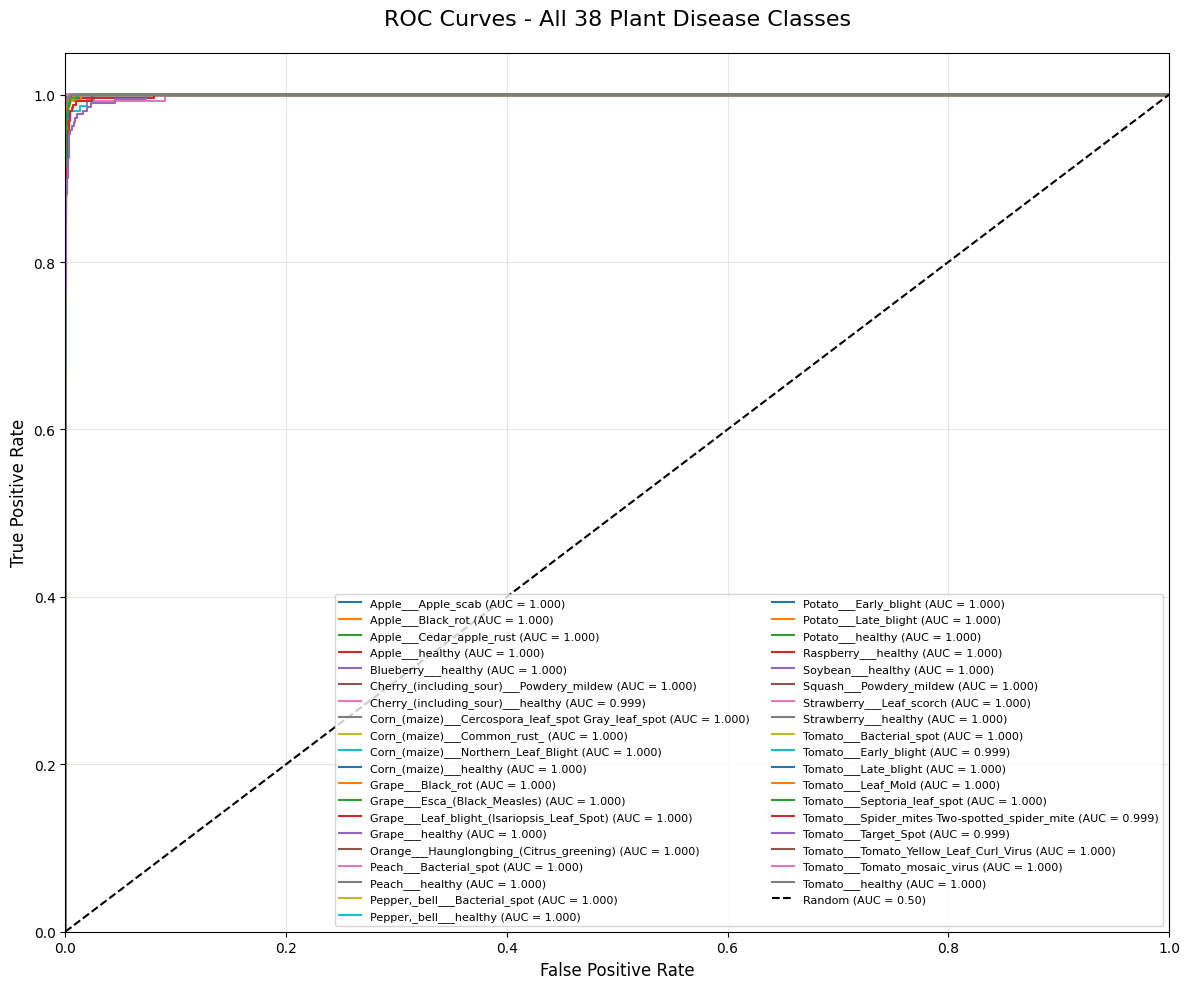

In [ ]:
plt.figure(figsize=(12, 10))

y_true_bin = label_binarize(y_true, classes=np.arange(test_generator.num_classes))

if y_true_bin.ndim == 1:
    y_true_bin = y_true_bin.reshape(-1, 1)

for i in range(test_generator.num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All 38 Plant Disease Classes', fontsize=16, pad=20)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ResNet

In [ ]:
# ============================================================================
# 1. LOAD PRE-TRAINED RESNET50 (include_top=True approach)
# ============================================================================

print("Loading pre-trained ResNet50 model...")

# Load ResNet50 with ImageNet weights, including the top (we'll replace it)
base_model = ResNet50(
    weights='imagenet',
    include_top=False,  # We'll build our own classifier
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling='avg'  # Use global average pooling at the end
)

print("✓ ResNet50 base model loaded successfully")
print(f"  - Pre-trained on ImageNet")
print(f"  - Input shape: ({IMG_SIZE}, {IMG_SIZE}, 3)")
print(f"  - Total base layers: {len(base_model.layers)}")

Loading pre-trained ResNet50 model...
✓ ResNet50 base model loaded successfully
  - Pre-trained on ImageNet
  - Input shape: (224, 224, 3)
  - Total base layers: 176


In [ ]:
# ============================================================================
# 2. BUILD COMPLETE MODEL WITH CUSTOM CLASSIFIER
# ============================================================================

print("\nBuilding complete model with custom classifier...")

# Create Sequential model
model = Sequential([
    base_model,

    # Custom classifier head (designed for plant diseases)
    Dense(1024, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(512, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Output layer
    Dense(train_generator.num_classes, activation='softmax')
], name='ResNet50_PlantDisease')

print("✓ Custom classification head added")
print(f"  - Number of classes: {train_generator.num_classes}")
print(f"  - Classifier layers: Dense(1024) → Dense(512) → Dense(256) → Output({train_generator.num_classes})")


Building complete model with custom classifier...
✓ Custom classification head added
  - Number of classes: 38
  - Classifier layers: Dense(1024) → Dense(512) → Dense(256) → Output(38)


# ResNet Transfer Learning

In [ ]:
# ============================================================================
# 3. PHASE 1: TRANSFER LEARNING (FROZEN BASE)
# ============================================================================

print("\n" + "="*80)
print("PHASE 1: TRANSFER LEARNING (Base Model Frozen)")
print("="*80)

# Freeze the base model
base_model.trainable = False

frozen_layers = sum([1 for layer in model.layers if not layer.trainable])
trainable_layers = sum([1 for layer in model.layers if layer.trainable])

print(f"  - Frozen layers: {frozen_layers}")
print(f"  - Trainable layers: {trainable_layers}")

# Compile model for Phase 1
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Higher LR for training new layers
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("  - Learning rate: 0.001")
print("  - Optimizer: Adam")

# Callbacks for Phase 1
checkpoint_phase1 = ModelCheckpoint(
    "/kaggle/working/resnet_phase1_best.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_phase1 = EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    verbose=1,
    restore_best_weights=True
)

reduce_lr_phase1 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

callbacks_phase1 = [checkpoint_phase1, early_stop_phase1, reduce_lr_phase1]

# Train Phase 1
print("\nStarting Phase 1 training...")
history_phase1 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=NUM_EPOCHS,
    verbose=1,
    callbacks=callbacks_phase1
)

# Phase 1 Results
best_val_acc_p1 = max(history_phase1.history['val_accuracy'])
best_epoch_p1 = history_phase1.history['val_accuracy'].index(best_val_acc_p1) + 1
final_val_acc_p1 = history_phase1.history['val_accuracy'][-1]
final_train_acc_p1 = history_phase1.history['accuracy'][-1]

print(f"\nPhase 1 Results:")
print(f"  Best validation accuracy: {best_val_acc_p1:.4f} at epoch {best_epoch_p1}")
print(f"  Final validation accuracy: {final_val_acc_p1:.4f}")
print(f"  Final training accuracy: {final_train_acc_p1:.4f}")


PHASE 1: TRANSFER LEARNING (Base Model Frozen)
  - Frozen layers: 1
  - Trainable layers: 13
  - Learning rate: 0.001
  - Optimizer: Adam

Starting Phase 1 training...
Epoch 1/30
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.2690 - loss: 4.0167
Epoch 1: val_accuracy improved from None to 0.13711, saving model to /kaggle/working/resnet_phase1_best.keras
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 511s 210ms/step - accuracy: 0.3116 - loss: 3.5636 - val_accuracy: 0.1371 - val_loss: 6.8984 - learning_rate: 0.0010
Epoch 2/30
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3670 - loss: 3.0147
Epoch 2: val_accuracy did not improve from 0.13711
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 485s 204ms/step - accuracy: 0.3690 - loss: 2.9767 - val_accuracy: 0.0330 - val_loss: 8.8596 - learning_rate: 0.0010
Epoch 3/30
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3791 - loss: 2.9075
Epoch 3: val_accuracy did not improve from 0.13711
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 482s 203ms/step - accura

# ResNet Fine-Tuning

In [ ]:
# ============================================================================
# 4. PHASE 2: FINE-TUNING (PARTIAL UNFREEZING)
# ============================================================================

print("\n" + "="*80)
print("PHASE 2: FINE-TUNING (Unfreezing Last Layers)")
print("="*80)

# Unfreeze the base model
base_model.trainable = True

# Strategy: Unfreeze only the last convolutional block (Conv5)
# ResNet50 structure: Conv1 → Conv2 → Conv3 → Conv4 → Conv5
# We'll freeze everything except Conv5 (last ~50 layers)

print("  - Unfreezing strategy: Last 50 layers of ResNet50")

# Freeze all layers except the last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False

frozen_count = sum([1 for layer in base_model.layers if not layer.trainable])
unfrozen_count = sum([1 for layer in base_model.layers if layer.trainable])

print(f"  - Frozen ResNet layers: {frozen_count}")
print(f"  - Unfrozen ResNet layers: {unfrozen_count}")
print(f"  - Total trainable layers in model: {sum([1 for layer in model.layers if layer.trainable])}")

# Recompile with MUCH lower learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # 100x lower than Phase 1!
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("  - Learning rate: 0.00001 (100x lower)")
print("  - Optimizer: Adam")

# Callbacks for Phase 2
checkpoint_phase2 = ModelCheckpoint(
    "/kaggle/working/resnet_phase2_best.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_phase2 = EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    verbose=1,
    restore_best_weights=True
)

reduce_lr_phase2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-8,
    verbose=1
)

callbacks_phase2 = [checkpoint_phase2, early_stop_phase2, reduce_lr_phase2]

# Train Phase 2
print("\nStarting Phase 2 fine-tuning...")
history_phase2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # More epochs for fine-tuning
    verbose=1,
    callbacks=callbacks_phase2
)

# Phase 2 Results
best_val_acc_p2 = max(history_phase2.history['val_accuracy'])
best_epoch_p2 = history_phase2.history['val_accuracy'].index(best_val_acc_p2) + 1
final_val_acc_p2 = history_phase2.history['val_accuracy'][-1]
final_train_acc_p2 = history_phase2.history['accuracy'][-1]

print(f"\nPhase 2 Results:")
print(f"  Best validation accuracy: {best_val_acc_p2:.4f} at epoch {best_epoch_p2}")
print(f"  Final validation accuracy: {final_val_acc_p2:.4f}")
print(f"  Final training accuracy: {final_train_acc_p2:.4f}")
print(f"  Best model saved as: /kaggle/working/resnet_phase2_best.keras")


PHASE 2: FINE-TUNING (Unfreezing Last Layers)
  - Unfreezing strategy: Last 50 layers of ResNet50
  - Frozen ResNet layers: 126
  - Unfrozen ResNet layers: 50
  - Total trainable layers in model: 14
  - Learning rate: 0.00001 (100x lower)
  - Optimizer: Adam

Starting Phase 2 fine-tuning...
Epoch 1/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.3643 - loss: 2.7250
Epoch 1: val_accuracy improved from None to 0.43377, saving model to /kaggle/working/resnet_phase2_best.keras
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 531s 213ms/step - accuracy: 0.4266 - loss: 2.3404 - val_accuracy: 0.4338 - val_loss: 2.1292 - learning_rate: 1.0000e-05
Epoch 2/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5029 - loss: 1.9587
Epoch 2: val_accuracy did not improve from 0.43377
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 479s 202ms/step - accuracy: 0.5137 - loss: 1.9214 - val_accuracy: 0.3987 - val_loss: 2.3959 - learning_rate: 1.0000e-05
Epoch 3/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accura

# Evaluation For ResNet

In [ ]:
# ============================================================================
# TEST SET EVALUATION
# ============================================================================

print("\n" + "="*80)
print("TEST SET EVALUATION")
print("="*80)

test_generator.reset()

test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // BATCH_SIZE + 1,
    verbose=1
)

print(f"\nFinal Test Accuracy  = {test_accuracy*100:.3f}%")
print(f"Final Test Loss      = {test_loss:.4f}")


TEST SET EVALUATION
510/510 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.6077 - loss: 1.5237

Final Test Accuracy  = 60.767%
Final Test Loss      = 1.5237


In [ ]:
# ============================================================================
# PREDICTIONS
# ============================================================================

y_pred = model.predict(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size + 1,
    verbose=1
)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


510/510 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step


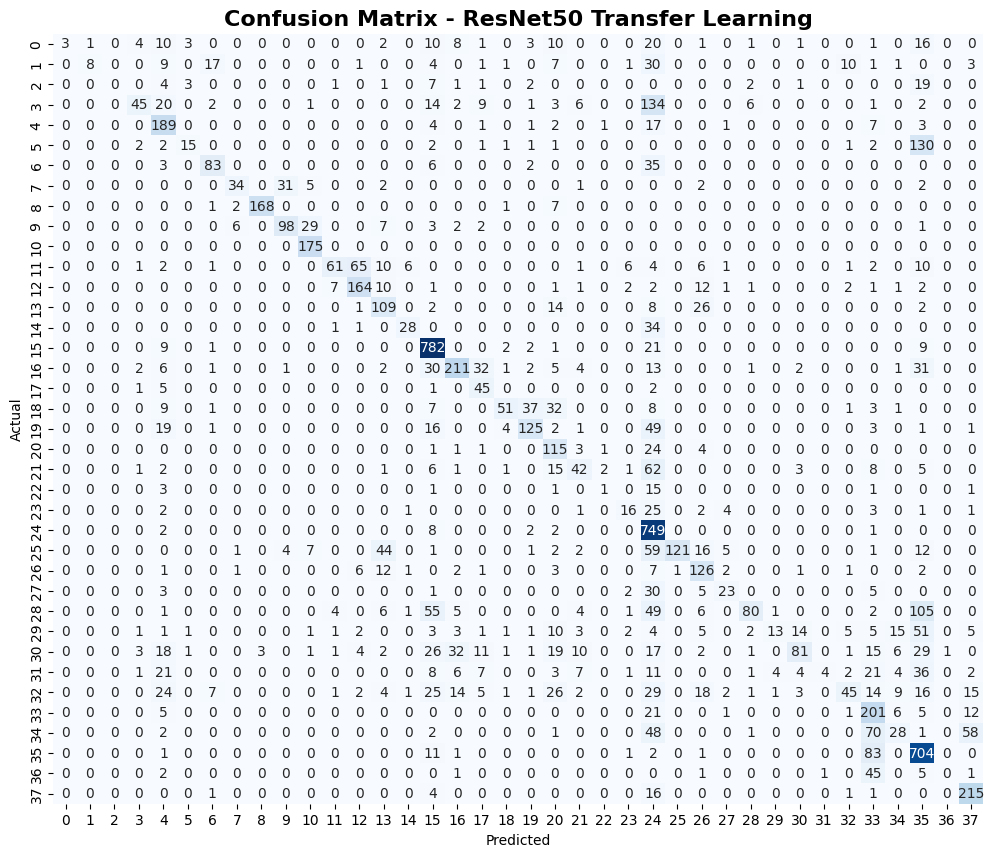

In [ ]:
# ============================================================================
# CONFUSION MATRIX
# ============================================================================

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - ResNet50 Transfer Learning', fontsize=16, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# ============================================================================
# CLASSIFICATION REPORT (PRECISION, RECALL, F1-SCORE)
# ============================================================================

print("\n" + "="*80)
print("Classification Report on True Test Set:")
print("="*80 + "\n")

class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Classification Report on True Test Set:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.03      0.06        95
                                 Apple___Black_rot       0.89      0.09      0.16        94
                          Apple___Cedar_apple_rust       0.00      0.00      0.00        42
                                   Apple___healthy       0.74      0.18      0.29       246
                               Blueberry___healthy       0.50      0.84      0.63       226
          Cherry_(including_sour)___Powdery_mildew       0.65      0.09      0.17       158
                 Cherry_(including_sour)___healthy       0.72      0.64      0.68       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.77      0.44      0.56        77
                       Corn_(maize)___Common_rust_       0.98      0.94      0.96       179
               Corn_(maize)___Norther

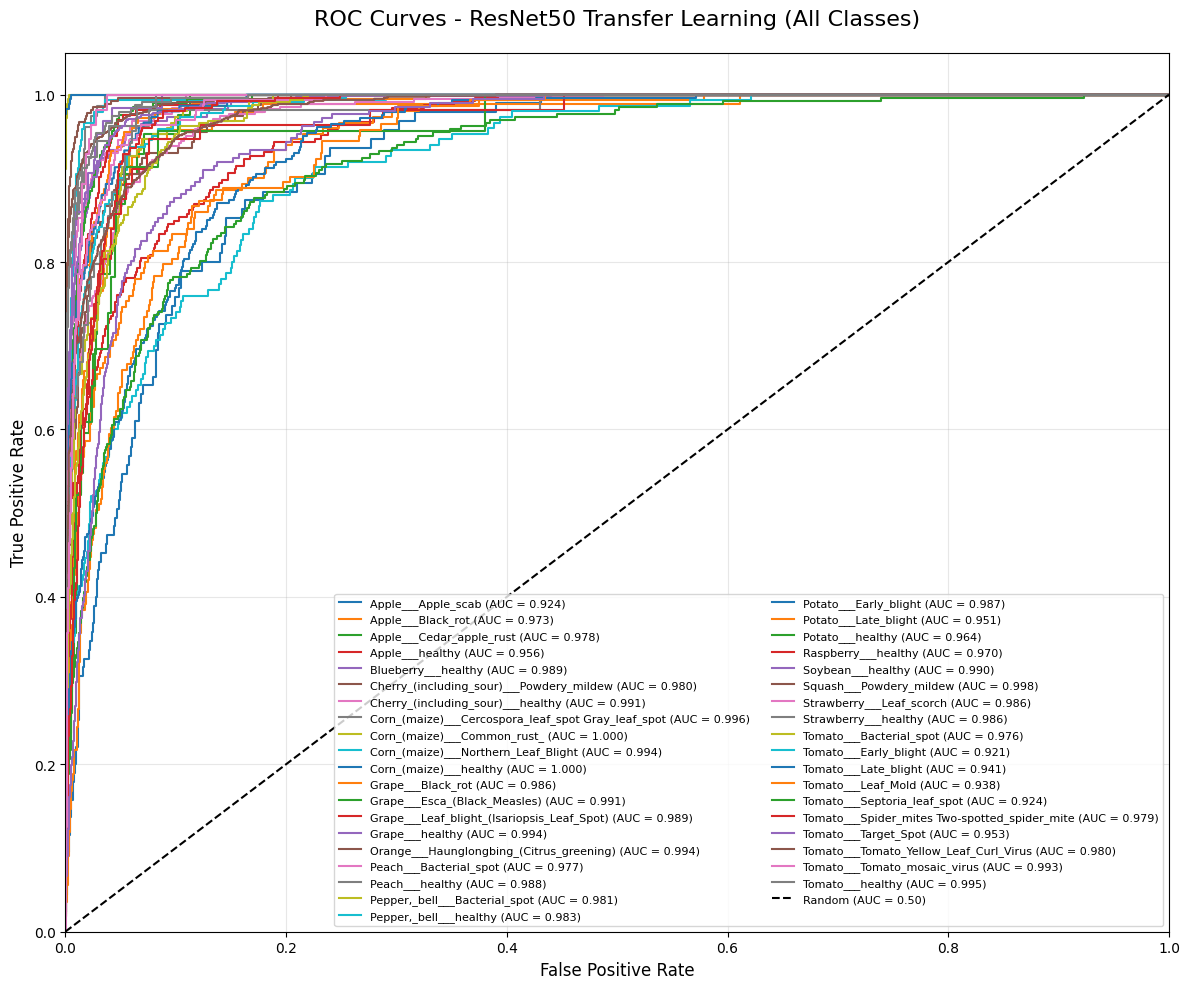

In [ ]:

# ============================================================================
# ROC & AUC CURVES
# ============================================================================

plt.figure(figsize=(12, 10))

y_true_bin = label_binarize(y_true, classes=np.arange(test_generator.num_classes))

if y_true_bin.ndim == 1:
    y_true_bin = y_true_bin.reshape(-1, 1)

# Plot ROC curve for each class
for i in range(test_generator.num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - ResNet50 Transfer Learning (All Classes)', fontsize=16, pad=20)
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# MobileNet

In [ ]:
# Model Build

base = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base.trainable = False

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
out = Dense(len(class_names), activation='softmax')(x)

model_mn = Model(inputs=base.input, outputs=out)
model_mn.compile(optimizer=Adam(1e-3),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Callbacks

best_path = "/kaggle/working/mobilenet_best.h5"

callbacks = [
    ModelCheckpoint(filepath=best_path,
                    monitor="val_accuracy",
                    save_best_only=True,
                    mode="max",
                    verbose=1),

    EarlyStopping(monitor="val_accuracy",
                  patience=5,
                  restore_best_weights=True,
                  mode="max",
                  verbose=1),

    ReduceLROnPlateau(monitor="val_loss",
                      factor=0.3,
                      patience=3,
                      verbose=1)
]

In [ ]:
# Training

history_frozen = model_mn.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7258 - loss: 1.0184
Epoch 1: val_accuracy improved from None to 0.90974, saving model to /kaggle/working/mobilenet_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 397s 164ms/step - accuracy: 0.8196 - loss: 0.6191 - val_accuracy: 0.9097 - val_loss: 0.2779 - learning_rate: 0.0010
Epoch 2/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8867 - loss: 0.3545
Epoch 2: val_accuracy improved from 0.90974 to 0.91710, saving model to /kaggle/working/mobilenet_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 379s 160ms/step - accuracy: 0.8895 - loss: 0.3433 - val_accuracy: 0.9171 - val_loss: 0.2479 - learning_rate: 0.0010
Epoch 3/20
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8997 - loss: 0.3071
Epoch 3: val_accuracy improved from 0.91710 to 0.93095, saving model to /kaggle/working/mobilenet_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 378s 159ms/step - accuracy: 0.8984 - loss: 0.3107 - val_accuracy: 0.9310 - val_loss: 0.212

In [ ]:
# Unfreeze + Fine-Tuning

for layer in base.layers[-40:]:
    layer.trainable = True

model_mn.compile(optimizer=Adam(1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_ft = model_mn.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15


2025-12-03 20:13:17.521335: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-03 20:13:17.717500: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7462 - loss: 1.3345
Epoch 1: val_accuracy did not improve from 0.95107
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 406s 164ms/step - accuracy: 0.8285 - loss: 0.6850 - val_accuracy: 0.9371 - val_loss: 0.1883 - learning_rate: 1.0000e-05
Epoch 2/15
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8977 - loss: 0.3200
Epoch 2: val_accuracy did not improve from 0.95107
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 379s 160ms/step - accuracy: 0.9080 - loss: 0.2861 - val_accuracy: 0.9508 - val_loss: 0.1454 - learning_rate: 1.0000e-05
Epoch 3/15
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9189 - loss: 0.2456
Epoch 3: val_accuracy improved from 0.95107 to 0.95879, saving model to /kaggle/working/mobilenet_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 380s 160ms/step - accuracy: 0.9228 - loss: 0.2302 - val_accuracy: 0.9588 - val_loss: 0.1213 - learning_rate: 1.0000e-05
Epoch 4/15
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9372 - los

In [ ]:
# Reset generator
test_generator.reset()

# Predictions
y_pred = model_mn.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

510/510 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step


# Evaluation For MobileNet

In [ ]:
class_names = list(train_generator.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n")
print(report)

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96        95
                                 Apple___Black_rot       1.00      1.00      1.00        94
                          Apple___Cedar_apple_rust       0.98      0.98      0.98        42
                                   Apple___healthy       0.99      1.00      0.99       246
                               Blueberry___healthy       0.99      1.00      1.00       226
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       158
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.76      0.92      0.84        77
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       179
               Corn_(maize)___Northern_Leaf_Blight     

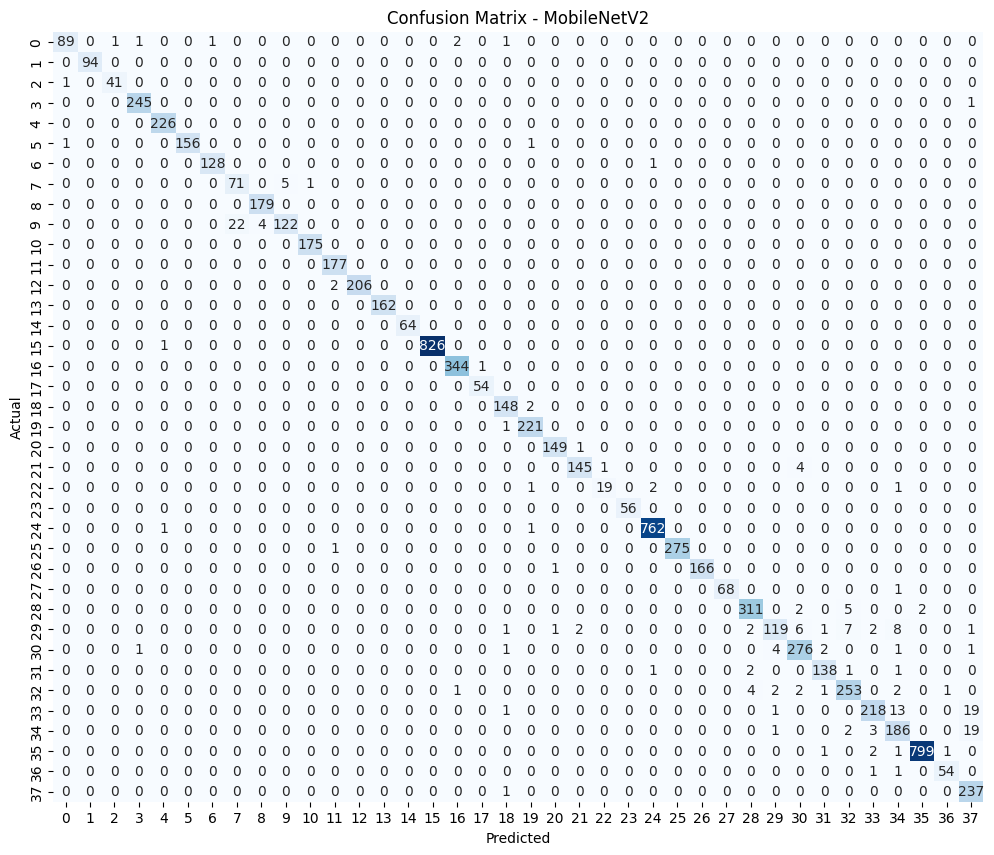

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MobileNetV2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

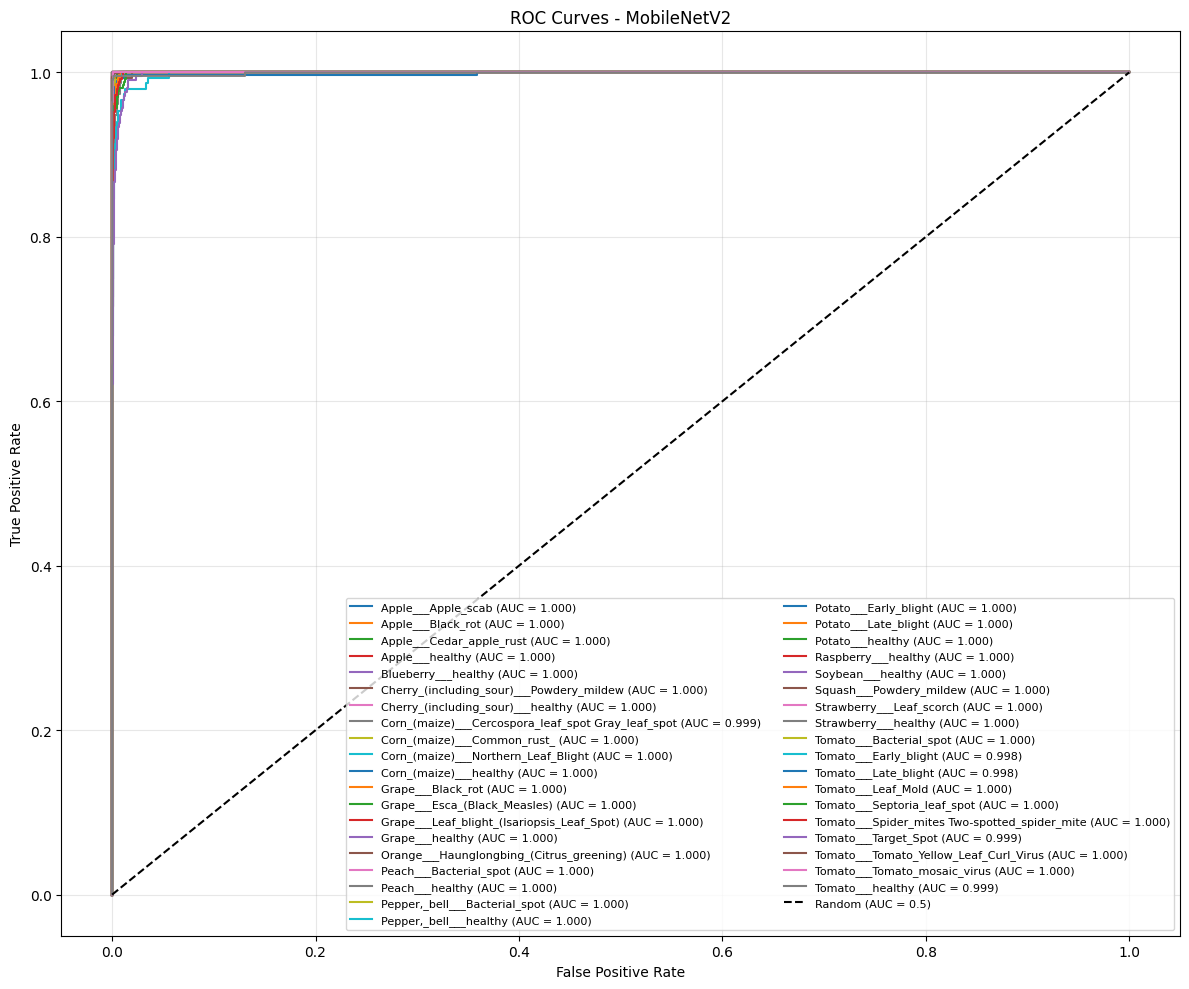

In [ ]:
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
if y_true_bin.ndim == 1:
    y_true_bin = y_true_bin.reshape(-1, 1)

plt.figure(figsize=(12,10))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.title('ROC Curves - MobileNetV2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
best_frozen_path = "/kaggle/working/mobilenetv2_best_frozen.h5"


model_mn.save(best_frozen_path)
print(f"Best frozen model saved at: {best_frozen_path}")


final_ft_path = "/kaggle/working/mobilenetv2_final_ft.h5"
model_mn.save(final_ft_path)
print(f"Final fine-tuned model saved at: {final_ft_path}")

Best frozen model saved at: /kaggle/working/mobilenetv2_best_frozen.h5
Final fine-tuned model saved at: /kaggle/working/mobilenetv2_final_ft.h5


# Vision Transformer(ViT)

In [ ]:
!pip install vit-keras

In [ ]:
# Download and load the pre-trained ViT model
base = vit.vit_b16(
    image_size=IMG_SIZE,
    activation='softmax',
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

base.trainable = False

x = base.output
x = Dropout(0.3)(x)
out = Dense(len(class_names), activation='softmax')(x)

model_vit = Model(inputs=base.input, outputs=out)

model_vit.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_vit.summary()

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Conv2D)              │ (None, 14, 14, 768)    │       590,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 196, 768)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ class_token (ClassToken)        │ (None, 197, 768)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_posembed_input      │ (None, 197, 768)       │       151,296 │
│ (AddPositionEmbs)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_0      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_1      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_2      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_3      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_4      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_5      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_6      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_7      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_8      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │               │
│                                 │ None)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Transformer_encoderblock_9      │ [(None, 197, 768),     │     7,087,872 │
│ (TransformerBlock)              │ (None, 12, None,       │             

 Total params: 85,827,878 (327.41 MB)

 Trainable params: 29,222 (114.15 KB)

 Non-trainable params: 85,798,656 (327.30 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

best_path = "/kaggle/working/vit_best.h5"

callbacks = [
    ModelCheckpoint(filepath=best_path,
                    monitor="val_accuracy",
                    save_best_only=True,
                    mode="max",
                    verbose=1),

    EarlyStopping(monitor="val_accuracy",
                  patience=5,
                  restore_best_weights=True,
                  mode="max",
                  verbose=1),

    ReduceLROnPlateau(monitor="val_loss",
                      factor=0.3,
                      patience=3,
                      verbose=1)
]

In [ ]:
history_frozen = model_vit.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8873 - loss: 0.3820
Epoch 1: val_accuracy improved from 0.88619 to 0.91930, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 450s 190ms/step - accuracy: 0.8898 - loss: 0.3682 - val_accuracy: 0.9193 - val_loss: 0.2682 - learning_rate: 1.0000e-04
Epoch 2/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9063 - loss: 0.3161
Epoch 2: val_accuracy improved from 0.91930 to 0.93341, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 448s 189ms/step - accuracy: 0.9080 - loss: 0.3067 - val_accuracy: 0.9334 - val_loss: 0.2265 - learning_rate: 1.0000e-04
Epoch 3/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9164 - loss: 0.2703
Epoch 3: val_accuracy improved from 0.93341 to 0.93856, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 449s 189ms/step - accuracy: 0.9170 - loss: 0.2684 - val_accuracy: 0.9386 - val_loss: 0.2063 - lea

In [ ]:
for layer in base.layers[-4:]:
    layer.trainable = True

model_vit.compile(optimizer=Adam(1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_ft = model_vit.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9500 - loss: 0.1525
Epoch 1: val_accuracy improved from 0.95548 to 0.96640, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 529s 206ms/step - accuracy: 0.9544 - loss: 0.1385 - val_accuracy: 0.9664 - val_loss: 0.0974 - learning_rate: 1.0000e-05
Epoch 2/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9609 - loss: 0.1158
Epoch 2: val_accuracy improved from 0.96640 to 0.96860, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 465s 196ms/step - accuracy: 0.9636 - loss: 0.1080 - val_accuracy: 0.9686 - val_loss: 0.0882 - learning_rate: 1.0000e-05
Epoch 3/10
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9681 - loss: 0.0928
Epoch 3: val_accuracy improved from 0.96860 to 0.97388, saving model to /kaggle/working/vit_best.h5
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 463s 195ms/step - accuracy: 0.9692 - loss: 0.0903 - val_accuracy: 0.9739 - val_loss: 0.0730 - lea

# Evaluation For ViT

In [ ]:
itest_generator.reset()

# Predictions
y_pred = model_vit.predict(test_generator, steps=test_generator.samples // BATCH_SIZE + 1, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes
class_names = list(train_generator.class_indices.keys())

report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report (ViT):\n")
print(report)

510/510 ━━━━━━━━━━━━━━━━━━━━ 54s 100ms/step
Classification Report (ViT):

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98        95
                                 Apple___Black_rot       0.99      1.00      0.99        94
                          Apple___Cedar_apple_rust       1.00      1.00      1.00        42
                                   Apple___healthy       0.99      1.00      0.99       246
                               Blueberry___healthy       0.99      1.00      1.00       226
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      1.00       158
                 Cherry_(including_sour)___healthy       1.00      0.99      1.00       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.92      0.88        77
                       Corn_(maize)___Common_rust_       0.99      1.00      1.00       179
     

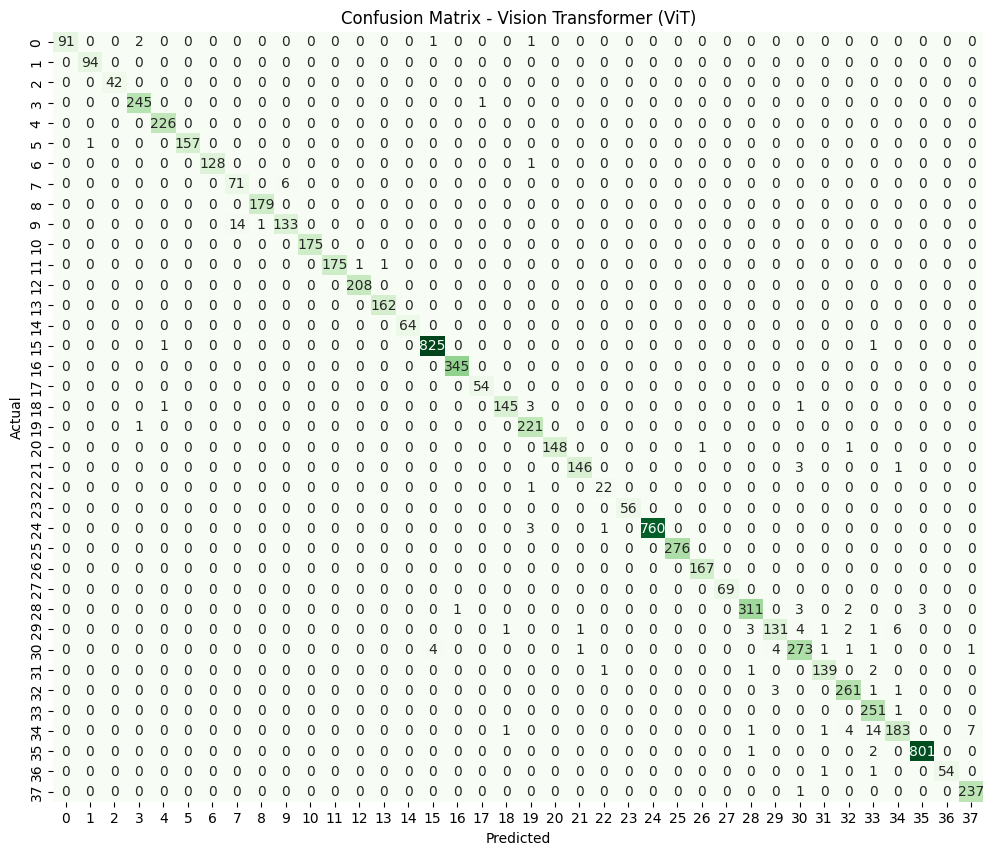

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False) # Changed to Greens for distinction
plt.title('Confusion Matrix - Vision Transformer (ViT)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

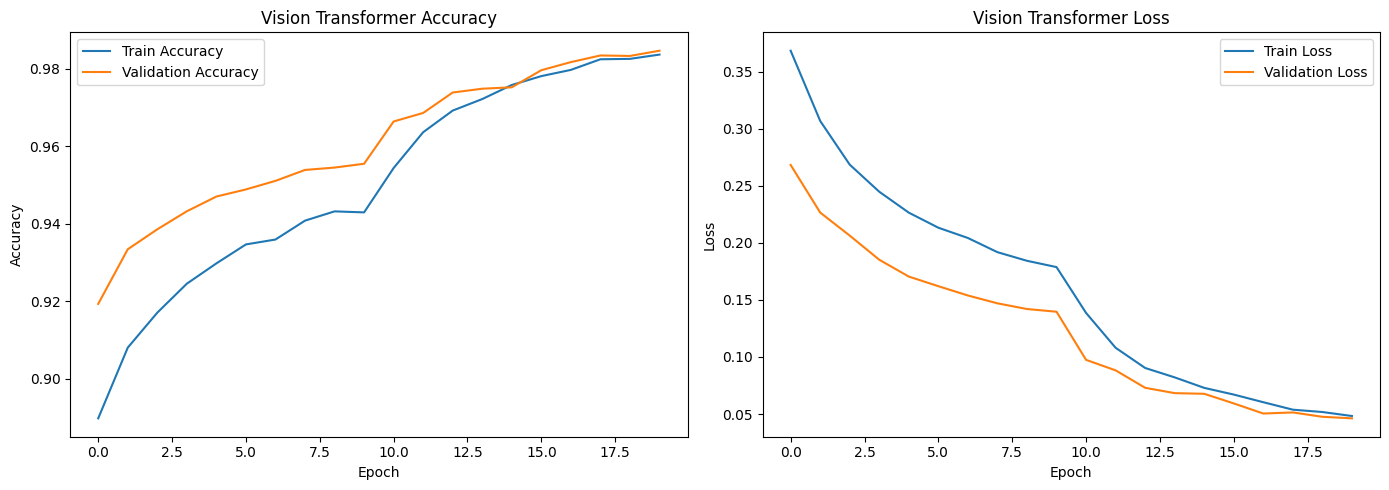

In [ ]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_frozen.history['accuracy'] + history_ft.history['accuracy'], label='Train Accuracy')
plt.plot(history_frozen.history['val_accuracy'] + history_ft.history['val_accuracy'], label='Validation Accuracy')
plt.title('Vision Transformer Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_frozen.history['loss'] + history_ft.history['loss'], label='Train Loss')
plt.plot(history_frozen.history['val_loss'] + history_ft.history['val_loss'], label='Validation Loss')
plt.title('Vision Transformer Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

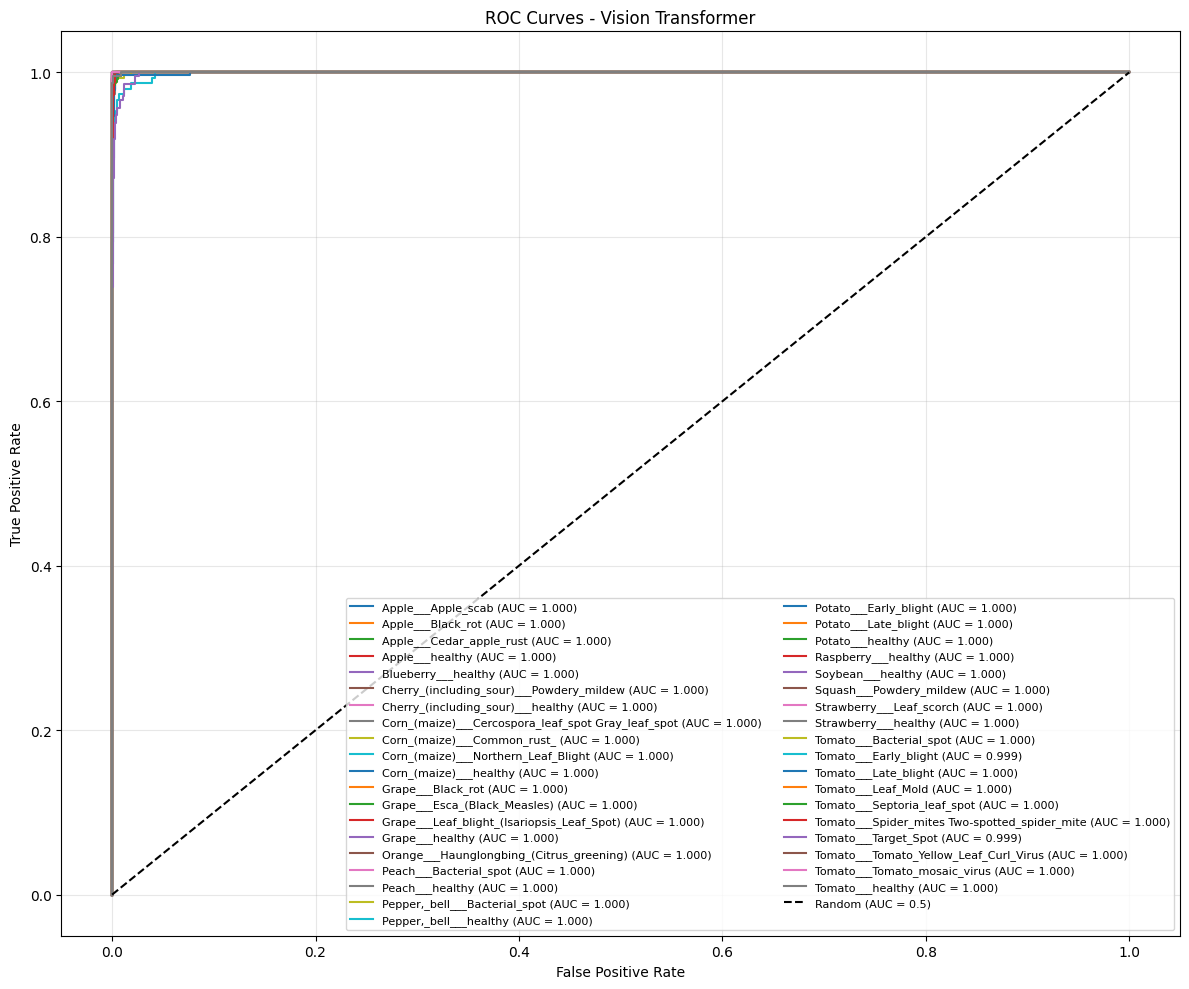

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
if y_true_bin.ndim == 1:
    y_true_bin = y_true_bin.reshape(-1, 1)

plt.figure(figsize=(12,10))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.title('ROC Curves - Vision Transformer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
final_path = "/kaggle/working/vit_final_state.h5"
model_vit.save(final_path)
print(f"\n✅ ViT Final (Fine-Tuned) model state saved to: {final_path}")


✅ ViT Final (Fine-Tuned) model state saved to: /kaggle/working/vit_final_state.h5


# Inception V1 GoogleNet

In [ ]:
# Model and training parameters
IMG_SIZE = 224
BATCH_SIZE = 16
NUM_CLASSES = 38
NUM_EPOCHS = 30
FINE_TUNE_EPOCHS = 10
BASE_LEARNING_RATE = 1e-3
FINE_TUNE_LEARNING_RATE = 1e-5

Downloading the Model using tfhub URL

In [ ]:
# Load hub model explicitly (NOT as KerasLayer)
inception_v1 = hub.load(
    "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"
)


Defining the Modle Class including it's layers

In [ ]:
class InceptionV1Layer(tf.keras.layers.Layer):
    def __init__(self, hub_url, trainable=False, **kwargs):
        super().__init__(**kwargs)
        self.hub_url = hub_url
        self.trainable_flag = trainable
        self.hub_layer = hub.KerasLayer(
            hub_url,
            trainable=trainable,
            name="inception_v1_feature_vector"
        )

    def build(self, input_shape):
        # Force variable creation for TF-Hub layer
        self.hub_layer.build(input_shape)
        super().build(input_shape)

    def call(self, inputs):
        return self.hub_layer(inputs)

    def get_config(self):
        config = super().get_config()
        config.update({
            "hub_url": self.hub_url,
            "trainable": self.trainable_flag
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


Training the model using the predefined input shape and output shape

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3), name="input_image")

x = InceptionV1Layer(
    "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5",
    trainable=False,
    name="inception_v1_base"
)(inputs)

outputs = tf.keras.layers.Dense(
    NUM_CLASSES,
    activation="softmax",
    name="predictions"
)(x)

model = tf.keras.Model(inputs, outputs, name="InceptionV1_TL")

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=BASE_LEARNING_RATE),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [28]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=7)
evaluation = model.evaluate(test_generator)
predection = model.predict(test_generator)

Epoch 1/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1488s 625ms/step - accuracy: 0.8281 - loss: 0.6813 - val_accuracy: 0.9032 - val_loss: 0.3328
Epoch 2/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1912s 805ms/step - accuracy: 0.9154 - loss: 0.2888 - val_accuracy: 0.9232 - val_loss: 0.2451
Epoch 3/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1511s 637ms/step - accuracy: 0.9262 - loss: 0.2346 - val_accuracy: 0.9303 - val_loss: 0.2157
Epoch 4/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1507s 635ms/step - accuracy: 0.9334 - loss: 0.2084 - val_accuracy: 0.9361 - val_loss: 0.1956
Epoch 5/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1503s 633ms/step - accuracy: 0.9398 - loss: 0.1881 - val_accuracy: 0.9403 - val_loss: 0.1860
Epoch 6/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1477s 622ms/step - accuracy: 0.9402 - loss: 0.1771 - val_accuracy: 0.9427 - val_loss: 0.1743
Epoch 7/7
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 1553s 636ms/step - accuracy: 0.9452 - loss: 0.1670 - val_accuracy: 0.9387 - val_loss: 0.1852
510/510 ━━━━━━━━━━━━━━━━━━━━ 227s 444ms/step - accuracy: 0.942

In [29]:
model.save("/content/inception_v1_plant_disease_final.keras")


# Evaluation For V1

In [32]:
# === 4. Evaluate on Test Set ===
test_loss, test_acc = evaluation
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Generate predictions for metrics
y_pred_prob = predection
y_pred = tf.argmax(y_pred_prob, axis=1).numpy()
y_true = test_generator.classes

# Classification report (precision, recall, F1 per class)
class_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Test Accuracy: 94.24%
Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.94      0.94        95
                                 Apple___Black_rot       1.00      0.94      0.97        94
                          Apple___Cedar_apple_rust       0.98      1.00      0.99        42
                                   Apple___healthy       0.99      0.98      0.99       246
                               Blueberry___healthy       0.98      1.00      0.99       226
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       158
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       129
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.77      0.82        77
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       179
               Corn_(maize)___Nor

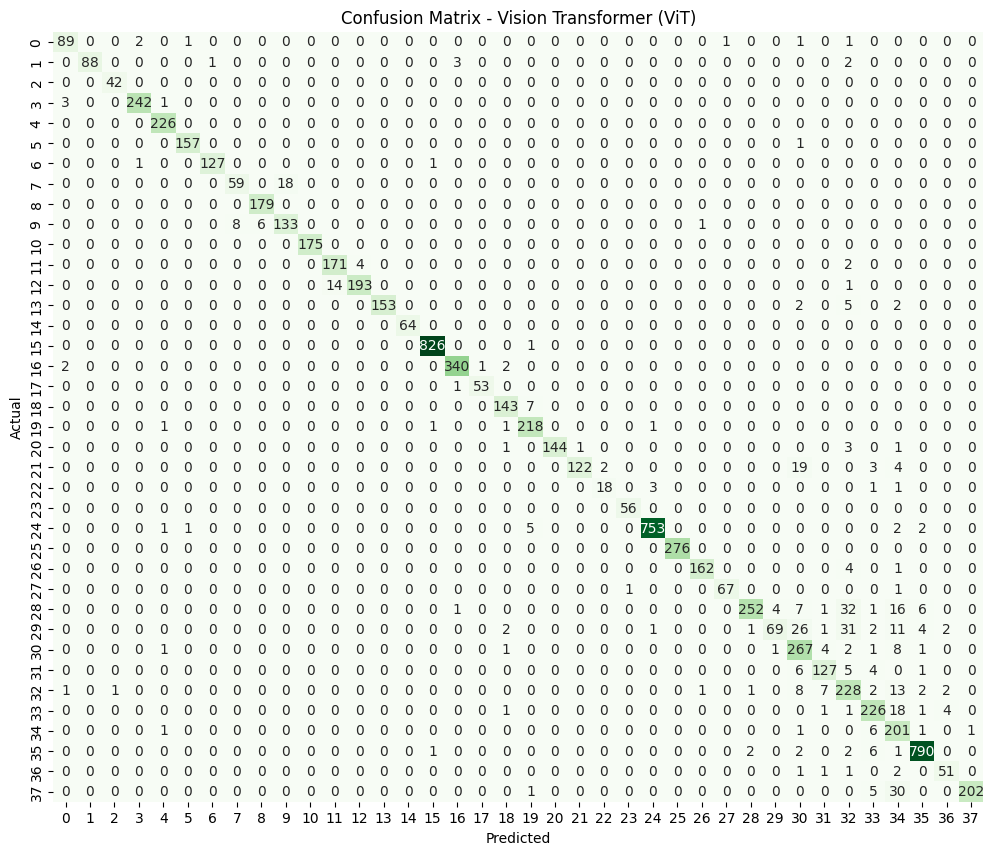

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred_classes = tf.argmax(y_pred_prob, axis=1).numpy()
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False) # Changed to Greens for distinction
plt.title('Confusion Matrix - Vision Transformer (ViT)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

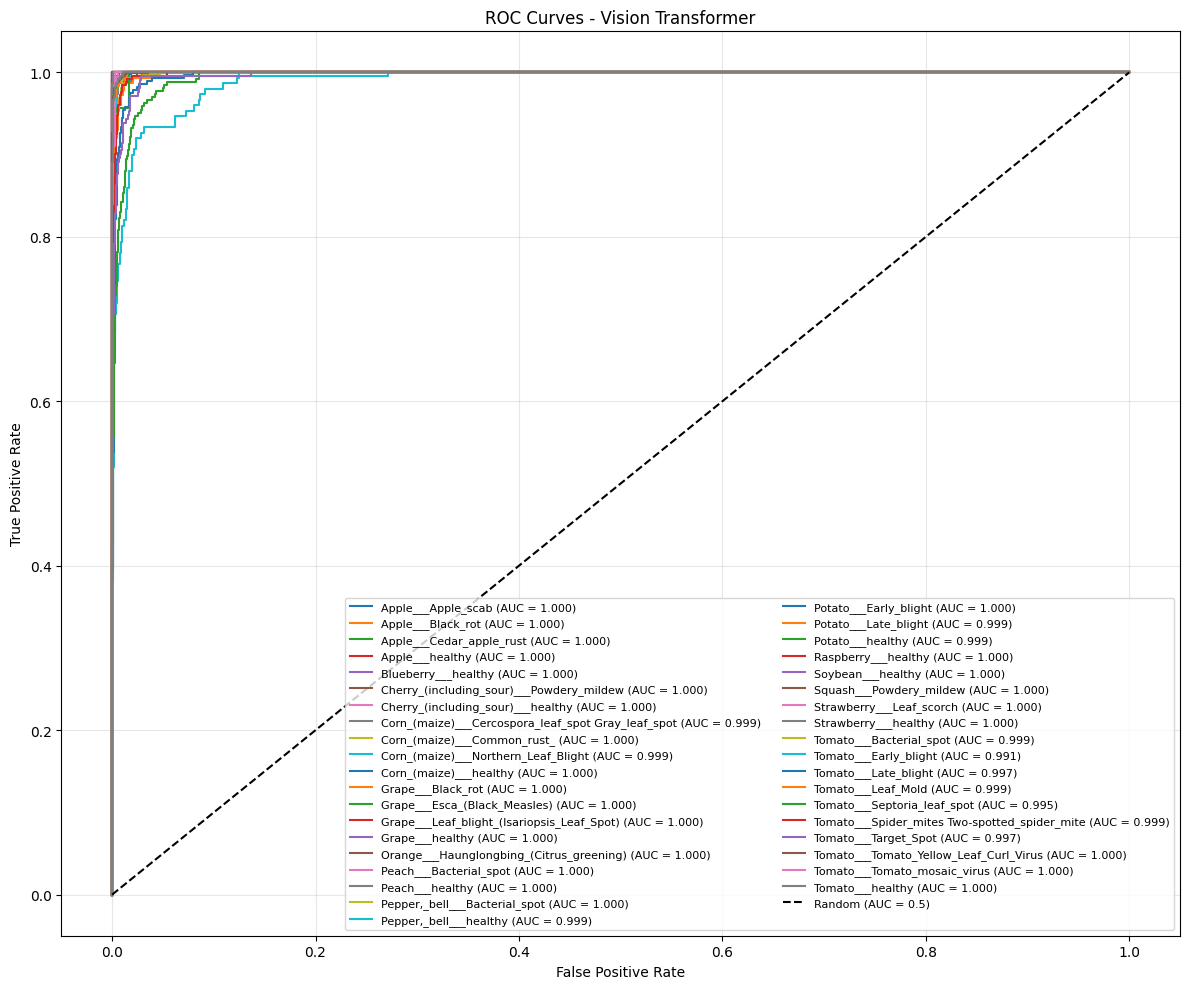

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
if y_true_bin.ndim == 1:
    y_true_bin = y_true_bin.reshape(-1, 1)

plt.figure(figsize=(12,10))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.title('ROC Curves - Vision Transformer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right", fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()